# 1 Introduction, Motivation and/or Problem Statement

## 1.1 Introduction
In the domain of agriculture, the early detection and accurate classification of leaf diseases play a critical role in ensuring crop health and optimizing yield. Leaf diseases, if not identified and managed promptly, can lead to significant losses in both quality and quantity of agricultural produce. Traditionally, the process of identifying leaf diseases has been carried out manually, which is not only labor-intensive and time-consuming but also prone to human error, especially in large-scale farming operations. With the advent of advanced artificial intelligence (AI) techniques, there is a growing interest in developing automated systems for leaf disease classification that can enhance the efficiency and accuracy of disease management in agriculture.

## 1.2 Motivation
Manual inspection of leaf diseases involves visually examining plants to identify symptoms and classify the type of disease affecting the crops. This traditional method is highly dependent on the expertise of the inspector and can vary significantly in accuracy. Furthermore, large-scale agricultural fields pose an additional challenge, as inspecting every plant becomes practically unfeasible. Environmental factors such as varying lighting conditions, different leaf orientations, and fluctuating weather further complicate the process, making it difficult to maintain consistency and reliability in disease detection.

The motivation behind this research is to leverage the capabilities of computer vision and neural networks to create an automated leaf disease classification system. Such a system promises several advantages: it can process images rapidly, provide consistent and accurate results, and operate in real-time, enabling timely interventions. By addressing the limitations of manual inspection, an AI-based system can significantly contribute to better disease management practices, reducing crop losses and improving overall agricultural productivity.

## 1.3 Problem Statement
Leaf disease classification is an essential aspect of agricultural management, crucial for the early detection and control of diseases that can severely impact crop yield and quality. Manual inspection methods are insufficient due to their labor-intensive nature, time consumption, and susceptibility to inaccuracies, particularly in large-scale farming scenarios. The goal of this research is to develop an automated system for classifying leaf diseases using state-of-the-art artificial intelligence techniques. The system should exhibit high accuracy, be robust to environmental variations such as lighting conditions and leaf orientations, and be capable of real-time monitoring and detection. Achieving these objectives will facilitate rapid intervention and control measures, ultimately enhancing agricultural productivity and sustainability.

# 2 Data Sources or RL Tasks

## 2.1 Data Sources
In this research project, we utilize a comprehensive dataset aimed at the classification of plant leaf diseases. The dataset has been preprocessed and augmented to enhance its robustness and utility for training advanced neural network models.

Link of dataset:
https://data.mendeley.com/datasets/tywbtsjrjv/1

## 2.2 Dataset Overview
The dataset consists of 61,486 images across 39 distinct classes, encompassing a variety of plant species and both healthy and diseased leaf conditions. This diversity ensures that the model can learn to identify a wide range of diseases affecting different types of plants. The specific classes included in the dataset are:
1.Apple_scab
2.Apple_black_rot
3.Apple_cedar_apple_rust
4.Apple_healthy
5.Background_without_leaves
6.Blueberry_healthy
7.Cherry_powdery_mildew
8.Cherry_healthy
9.Corn_gray_leaf_spot
10.Corn_common_rust
11.Corn_northern_leaf_blight
12.Corn_healthy
13.Grape_black_rot
14.Grape_black_measles
15.Grape_leaf_blight
16.Grape_healthy
17.Orange_haunglongbing
18.Peach_bacterial_spot
19.Peach_healthy
20.Pepper_bacterial_spot
21.Pepper_healthy
22.Potato_early_blight
23.Potato_healthy
24.Potato_late_blight
25.Raspberry_healthy
26.Soybean_healthy
27.Squash_powdery_mildew
28.Strawberry_healthy
29.Strawberry_leaf_scorch
30.Tomato_bacterial_spot
31.Tomato_early_blight
32.Tomato_healthy
33.Tomato_late_blight
34.Tomato_leaf_mold
35.Tomato_septoria_leaf_spot
36.Tomato_spider_mites_two-spotted_spider_mite
37.Tomato_target_spot
38.Tomato_mosaic_virus
39.Tomato_yellow_leaf_curl_virus

# 3 Exploratory Analysis of Data

## 3.1 Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Unzip the original dataset
zip_path = '/content/drive/My Drive/Plant_leaf_diseases_dataset_with_augmentation.zip'
extract_path = '/content'  # Target path to extract

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the decompression result
print("Decompression completed, file list: ")
print(os.listdir(extract_path))

Decompression completed, file list: 
['.config', 'Plant_leave_diseases_dataset_resized', 'Plant_leave_diseases_dataset_with_augmentation', 'drive', 'sample_data']


## 3.2 Data Analysis

### 3.2.1 Check how many categories there are and the number of images in each category (to determine whether the dataset is balanced. If it is unbalanced, consider using a subset during later training)

Peach___healthy: 1000 images
Apple___Black_rot: 1000 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 images
Blueberry___healthy: 1502 images
Pepper,_bell___healthy: 1478 images
Cherry___Powdery_mildew: 1052 images
Apple___Cedar_apple_rust: 1000 images
Cherry___healthy: 1000 images
Corn___Northern_Leaf_Blight: 1000 images
Orange___Haunglongbing_(Citrus_greening): 5507 images
Tomato___Leaf_Mold: 1000 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
Potato___Late_blight: 1000 images
Background_without_leaves: 1143 images
Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
Apple___healthy: 1645 images
Pepper,_bell___Bacterial_spot: 1000 images
Strawberry___Leaf_scorch: 1109 images
Corn___Cercospora_leaf_spot Gray_leaf_spot: 1000 images
Peach___Bacterial_spot: 2297 images
Potato___healthy: 1000 images
Tomato___Late_blight: 1909 images
Tomato___Target_Spot: 1404 images
Grape___Esca_(Black_Measles): 1383 images
Corn___Common_rust: 1192 images
Tomato___healthy: 1591 im

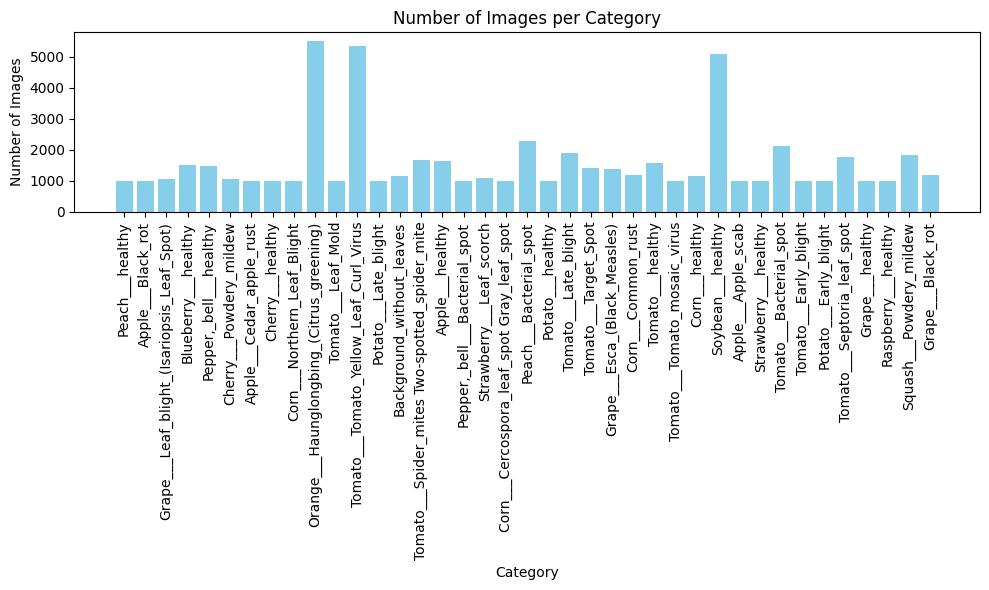

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the dataset directory
data_dir = 'Plant_leave_diseases_dataset_with_augmentation'

# Get all subdirectories
subdirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Initialize a dictionary to store the number of images in each subdirectory
image_counts = {}

# Iterate through each subdirectory and count the number of images
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    image_counts[subdir] = len(image_files)

# Print the number of images in each subdirectory
for subdir, count in image_counts.items():
    print(f'{subdir}: {count} images')

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.2.2 Check whether the RGB channels are consistent (if they are inconsistent, the image needs to be adjusted and further preprocessed to ensure that all images are in RGB format

In [ ]:
# Initialize a dictionary to store counts of different modes
mode_counts = defaultdict(int)

# Iterate through each subdirectory and check the image mode
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        with Image.open(image_path) as img:
            mode_counts[img.mode] += 1

# Print each mode and its count
for mode, count in mode_counts.items():
    print(f'Mode: {mode}, Count: {count}')

Mode: RGB, Count: 61485
Mode: RGBA, Count: 1


### 3.2.3 Check if all images are of the same size (if they are of different sizes, further preprocessing is required to ensure that all models have the same input size)

In [ ]:
from PIL import Image
from collections import defaultdict

# Initialize a collection to store different image sizes
image_sizes = set()

# Iterate through each subdirectory and check the image size
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        with Image.open(image_path) as img:
            image_sizes.add(img.size)

# Print all different image sizes
for size in image_sizes:
    print(size)

(350, 350)
(256, 192)
(204, 204)
(256, 256)


## 3.3 Data preprocessing

### 3.3.1 Modify RGB channels

In [ ]:
# Iterate through each subdirectory and check the image mode
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        with Image.open(image_path) as img:
            if img.mode == 'RGBA':
                print(f'Converting RGBA image: {image_path}')
                rgb_image = img.convert('RGB')
                rgb_image.save(image_path)
                print(f'Saved RGB image: {image_path}')


Converting RGBA image: Plant_leave_diseases_dataset_with_augmentation/Pepper,_bell___healthy/image (1).png
Saved RGB image: Plant_leave_diseases_dataset_with_augmentation/Pepper,_bell___healthy/image (1).png


In [ ]:
# Check that all images are in RGB format
non_rgb_count = 0

# Iterate through each subdirectory and check the image mode
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        with Image.open(image_path) as img:
            if img.mode != 'RGB':
                non_rgb_count += 1
                print(f'Non-RGB image found: {image_path} with mode {img.mode}')

# Print the total number of non-RGB images (make sure all images are in RGB format)
print(f'Total non-RGB images: {non_rgb_count}')

Total non-RGB images: 0


In [ ]:
import shutil
import os

#Define the dataset directory
data_dir = 'Plant_leave_diseases_dataset_with_augmentation'
output_filename = 'Plant_leave_diseases_dataset_with_augmentation.zip'

# Compressed Directory
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', data_dir)


'/content/Plant_leave_diseases_dataset_with_augmentation.zip'

### 3.3.2 Split the dataset
Because we found data imbalance in 3.2.1, each category has at least 1000 images, and most categories have about 1000 images. We decided to keep 1000 images for each class, and then divide the training set, validation set, and test set in a ratio of 85:10:5.

In [ ]:
import random

output_dir = 'Plant_leave_diseases_dataset_split'

# Create Output Directory
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Get all subdirectories
subdirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Division ratio
train_ratio = 0.85
val_ratio = 0.10
test_ratio = 0.05

# Iterate through each subdirectory and process the images
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]

    # Randomly extract 1000 images
    selected_images = random.sample(image_files, 1000)

    # Calculate the number of divisions
    train_count = int(len(selected_images) * train_ratio)
    val_count = int(len(selected_images) * val_ratio)
    test_count = len(selected_images) - train_count - val_count

    # Divide the image
    train_images = selected_images[:train_count]
    val_images = selected_images[train_count:train_count + val_count]
    test_images = selected_images[train_count + val_count:]

    # Create a subdirectory
    for category, images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
        category_dir = os.path.join(output_dir, category, subdir)
        if not os.path.exists(category_dir):
            os.makedirs(category_dir)
        for image in images:
            shutil.copy(os.path.join(subdir_path, image), os.path.join(category_dir, image))

print('Dataset partitioning completed.')


Dataset partitioning completed.


In [ ]:
# Define the dataset directory
data_dir = 'Plant_leave_diseases_dataset_split'
output_filename = 'Plant_leave_diseases_dataset_split.zip'

# Compressed Directory
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', data_dir)

'/content/Plant_leave_diseases_dataset_split.zip'

### 3.3.3 Change the size of all images to 224*224

In [ ]:
import os
from PIL import Image

# Use the already segmented dataset directory
input_dir = 'Plant_leave_diseases_dataset_split'
output_dir = 'Plant_leave_diseases_dataset_resized'

# Define the target image size
target_size = (224, 224)

# Make sure the output directory exists
for category in ['train', 'val', 'test']:
    category_dir = os.path.join(output_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)
        subdirs = [d for d in os.listdir(os.path.join(input_dir, category)) if os.path.isdir(os.path.join(input_dir, category, d))]
        for subdir in subdirs:
            os.makedirs(os.path.join(category_dir, subdir))

# Iterate over all categories and resize the images
for category in ['train', 'val', 'test']:
    category_dir = os.path.join(input_dir, category)
    subdirs = [d for d in os.listdir(category_dir) if os.path.isdir(os.path.join(category_dir, d))]

    for subdir in subdirs:
        subdir_path = os.path.join(category_dir, subdir)
        image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]

        for image_file in image_files:
            image_path = os.path.join(subdir_path, image_file)
            with Image.open(image_path) as img:
                img = img.resize(target_size)
                # Save the resized image to a new directory
                output_image_path = os.path.join(output_dir, category, subdir, image_file)
                img.save(output_image_path)


In [ ]:
# Define the dataset directory
data_dir = 'Plant_leave_diseases_dataset_resized'
output_filename = 'Plant_leave_diseases_dataset_resized.zip'

# Compressed Directory
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', data_dir)

'/content/Plant_leave_diseases_dataset_resized.zip'

### 3.3.4 Make sure the final dataset has the correct size

In [ ]:
import os

# Define the dataset directory
resized_data_dir = 'Plant_leave_diseases_dataset_resized'

# Get all sets (train, val, test)
sets = ['train', 'val', 'test']

# Initialize a dictionary to store the number of images in each collection and subdirectory
image_counts = {}

# Iterate through each collection
for set_name in sets:
    set_path = os.path.join(resized_data_dir, set_name)
    if os.path.exists(set_path):
        # Get all subdirectories
        subdirs = [d for d in os.listdir(set_path) if os.path.isdir(os.path.join(set_path, d))]

        image_counts[set_name] = {}

        # Iterate through each subdirectory and count the number of images
        for subdir in subdirs:
            subdir_path = os.path.join(set_path, subdir)
            image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
            image_counts[set_name][subdir] = len(image_files)

# Print the number of images in each collection and subdirectory
for set_name, subdir_counts in image_counts.items():
    print(f'{set_name} set:')
    for subdir, count in subdir_counts.items():
        print(f'  {subdir}: {count} images')


train set:
  Peach___healthy: 850 images
  Apple___Black_rot: 850 images
  Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 850 images
  Blueberry___healthy: 850 images
  Pepper,_bell___healthy: 850 images
  Cherry___Powdery_mildew: 850 images
  Apple___Cedar_apple_rust: 850 images
  Cherry___healthy: 850 images
  Corn___Northern_Leaf_Blight: 850 images
  Orange___Haunglongbing_(Citrus_greening): 850 images
  Tomato___Leaf_Mold: 850 images
  Tomato___Tomato_Yellow_Leaf_Curl_Virus: 850 images
  Potato___Late_blight: 850 images
  Background_without_leaves: 850 images
  Tomato___Spider_mites Two-spotted_spider_mite: 850 images
  Apple___healthy: 850 images
  Pepper,_bell___Bacterial_spot: 850 images
  Strawberry___Leaf_scorch: 850 images
  Corn___Cercospora_leaf_spot Gray_leaf_spot: 850 images
  Peach___Bacterial_spot: 850 images
  Potato___healthy: 850 images
  Tomato___Late_blight: 850 images
  Tomato___Target_Spot: 850 images
  Grape___Esca_(Black_Measles): 850 images
  Corn___Common_rust: 

# 4 Model training and saving

## 4.0 Download Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/My Drive/Plant_leave_diseases_dataset_resized.zip'
extract_path = '/content/Plant_leave_diseases_dataset_resized'  # Target path to extract

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Convert file and subdirectory names to lower case
def rename_files_to_lowercase(directory):
    for root, dirs, files in os.walk(directory, topdown=False):
        for name in files:
            old_path = os.path.join(root, name)
            new_path = os.path.join(root, name.lower())
            os.rename(old_path, new_path)
        for name in dirs:
            old_path = os.path.join(root, name)
            new_path = os.path.join(root, name.lower())
            os.rename(old_path, new_path)

# Perform file name conversion
rename_files_to_lowercase(extract_path)
print("Finish unzip.")

Finish unzip.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torchvision.datasets as datasets
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from itertools import cycle

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Unified transform configuration
common_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create an ImageFolder subclass that maps by custom index
class CustomImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform=None, target_transform=None):
        super().__init__(root, transform=transform, target_transform=target_transform)
        self.class_to_idx = class_to_idx
        self.idx_to_class = {v: k for k, v in self.class_to_idx.items()}
        self.samples = [(path, self.class_to_idx[target]) for (path, target) in self.samples]

train_transform = common_transform
val_transform = common_transform
test_transform = common_transform

# Loading the dataset
train_dataset = datasets.ImageFolder(root='/content/Plant_leave_diseases_dataset_resized/train', transform=train_transform)
val_dataset = datasets.ImageFolder(root='/content/Plant_leave_diseases_dataset_resized/val', transform=val_transform)
test_dataset = datasets.ImageFolder(root='/content/Plant_leave_diseases_dataset_resized/test', transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, num_workers=8,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, num_workers=8, shuffle=False)

# Print class name and corresponding label
class_to_idx = train_dataset.class_to_idx
print("Class names and corresponding tags: ")
for class_name, class_idx in class_to_idx.items():
    print(f"Class name: {class_name}, Class index: {class_idx}")


Class names and corresponding tags: 
Class name: apple___apple_scab, Class index: 0
Class name: apple___black_rot, Class index: 1
Class name: apple___cedar_apple_rust, Class index: 2
Class name: apple___healthy, Class index: 3
Class name: background_without_leaves, Class index: 4
Class name: blueberry___healthy, Class index: 5
Class name: cherry___healthy, Class index: 6
Class name: cherry___powdery_mildew, Class index: 7
Class name: corn___cercospora_leaf_spot gray_leaf_spot, Class index: 8
Class name: corn___common_rust, Class index: 9
Class name: corn___healthy, Class index: 10
Class name: corn___northern_leaf_blight, Class index: 11
Class name: grape___black_rot, Class index: 12
Class name: grape___esca_(black_measles), Class index: 13
Class name: grape___healthy, Class index: 14
Class name: grape___leaf_blight_(isariopsis_leaf_spot), Class index: 15
Class name: orange___haunglongbing_(citrus_greening), Class index: 16
Class name: peach___bacterial_spot, Class index: 17
Class name:

## 4.1 Defining a simple CNN model

In [ ]:
# Defining a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# Move the model to the defined device
model = SimpleCNN(num_classes=len(train_dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 4.2 Define the resnet transfer learning model

In [ ]:
model = models.resnet18(pretrained=True)
# Get the input feature number of the last fully connected layer
num= model.fc.in_features

# Modify the last fully connected layer
model.fc = nn.Linear(num, 39)

# Move the model to the device
model= model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


## 4.3 Defining a resnet non-transfer learning model

In [ ]:
model = models.resnet18(weights=None)

# Get the input feature number of the last fully connected layer
num = model.fc.in_features

# Modify the last fully connected layer so that its output number is consistent with the number of categories in the classification task
model.fc = nn.Linear(num, 39)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-3)



## 4.4 Defining the vgg16 transfer learning model

In [ ]:
model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)

# Get the input feature number of the last fully connected layer
num_features = model.classifier[6].in_features

# Modify the last fully connected layer so that its output number is consistent with the number of categories in the classification task
model.classifier[6] = nn.Linear(num_features, 39)

# Move the model to the device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-3)

## 4.5 Define vgg16 non-transfer learning model

In [ ]:
model = models.vgg16(weights=None)

# Get the input feature number of the last fully connected layer
num_features = model.classifier[6].in_features

# Modify the last fully connected layer so that its output number is consistent with the number of categories in the classification task
model.classifier[6] = nn.Linear(num_features, 39)

# Move the model to the device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-3)

## 4.6 Train the models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluate(model, num_epochs=15):
    history = {
        'train': {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
        'val': {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    }

    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        train_outputs = []
        train_labels = []

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            train_outputs.extend(torch.argmax(outputs, 1).detach().cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

            if (batch_idx + 1) % 10 == 0:  # Optionally print every 10 batches
                batch_loss = np.mean(train_losses[-10:])  # Average loss for the last 10 batches
                batch_acc = accuracy_score(train_labels[-len(inputs):], train_outputs[-len(inputs):])
                print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Train Loss: {batch_loss:.4f}, Accuracy: {batch_acc:.4f}')

        # Calculate metrics for the epoch
        train_accuracy = accuracy_score(train_labels, train_outputs)
        train_precision = precision_score(train_labels, train_outputs, average='weighted', zero_division=0)
        train_recall = recall_score(train_labels, train_outputs, average='weighted', zero_division=0)
        train_f1 = f1_score(train_labels, train_outputs, average='weighted', zero_division=0)

        history['train']['loss'].append(np.mean(train_losses))
        history['train']['accuracy'].append(train_accuracy)
        history['train']['precision'].append(train_precision)
        history['train']['recall'].append(train_recall)
        history['train']['f1'].append(train_f1)

        model.eval()
        val_losses = []
        val_outputs = []
        val_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_losses.append(loss.item())
                val_outputs.extend(torch.argmax(outputs, 1).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_outputs)
        val_precision = precision_score(val_labels, val_outputs, average='weighted', zero_division=0)
        val_recall = recall_score(val_labels, val_outputs, average='weighted', zero_division=0)
        val_f1 = f1_score(val_labels, val_outputs, average='weighted', zero_division=0)

        history['val']['loss'].append(np.mean(val_losses))
        history['val']['accuracy'].append(val_accuracy)
        history['val']['precision'].append(val_precision)
        history['val']['recall'].append(val_recall)
        history['val']['f1'].append(val_f1)

        print(f'Epoch {epoch+1}, Val Loss: {np.mean(val_losses):.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Save the model
        torch.save(model.state_dict(), 'model_simple.pth')

    return history
class_to_idx = train_dataset.class_to_idx
print("Class names and corresponding tags:")
for class_name, class_idx in class_to_idx.items():
    print(f"Class name: {class_name}, Class index: {class_idx}")

Class names and corresponding tags:
Class name: apple___apple_scab, Class index: 0
Class name: apple___black_rot, Class index: 1
Class name: apple___cedar_apple_rust, Class index: 2
Class name: apple___healthy, Class index: 3
Class name: background_without_leaves, Class index: 4
Class name: blueberry___healthy, Class index: 5
Class name: cherry___healthy, Class index: 6
Class name: cherry___powdery_mildew, Class index: 7
Class name: corn___cercospora_leaf_spot gray_leaf_spot, Class index: 8
Class name: corn___common_rust, Class index: 9
Class name: corn___healthy, Class index: 10
Class name: corn___northern_leaf_blight, Class index: 11
Class name: grape___black_rot, Class index: 12
Class name: grape___esca_(black_measles), Class index: 13
Class name: grape___healthy, Class index: 14
Class name: grape___leaf_blight_(isariopsis_leaf_spot), Class index: 15
Class name: orange___haunglongbing_(citrus_greening), Class index: 16
Class name: peach___bacterial_spot, Class index: 17
Class name: 

In [ ]:
# Execute training: cnn
history = train_and_evaluate(model, num_epochs=15)

Epoch 1, Batch 10, Train Loss: 6.4902, Accuracy: 0.0781
Epoch 1, Batch 20, Train Loss: 3.5440, Accuracy: 0.0781
Epoch 1, Batch 30, Train Loss: 3.4262, Accuracy: 0.1250
Epoch 1, Batch 40, Train Loss: 3.2333, Accuracy: 0.1328
Epoch 1, Batch 50, Train Loss: 3.0449, Accuracy: 0.2266
Epoch 1, Batch 60, Train Loss: 2.8471, Accuracy: 0.2344
Epoch 1, Batch 70, Train Loss: 2.6673, Accuracy: 0.3320
Epoch 1, Batch 80, Train Loss: 2.5075, Accuracy: 0.2969
Epoch 1, Batch 90, Train Loss: 2.3337, Accuracy: 0.3633
Epoch 1, Batch 100, Train Loss: 2.2216, Accuracy: 0.4297
Epoch 1, Batch 110, Train Loss: 2.1082, Accuracy: 0.3672
Epoch 1, Batch 120, Train Loss: 2.0440, Accuracy: 0.4531
Epoch 1, Batch 130, Train Loss: 1.9689, Accuracy: 0.3730
Epoch 1, Val Loss: 1.4362, Val Accuracy: 0.6072
Epoch 2, Batch 10, Train Loss: 1.8249, Accuracy: 0.4414
Epoch 2, Batch 20, Train Loss: 1.8097, Accuracy: 0.4570
Epoch 2, Batch 30, Train Loss: 1.7453, Accuracy: 0.4453
Epoch 2, Batch 40, Train Loss: 1.7086, Accuracy: 0.4

In [ ]:
# Execute training: resnet transfer learning
history = train_and_evaluate(model, num_epochs=15)

Epoch 1, Batch 10, Train Loss: 3.5922, Accuracy: 0.1602
Epoch 1, Batch 20, Train Loss: 3.2278, Accuracy: 0.3594
Epoch 1, Batch 30, Train Loss: 2.8662, Accuracy: 0.4727
Epoch 1, Batch 40, Train Loss: 2.5308, Accuracy: 0.6719
Epoch 1, Batch 50, Train Loss: 2.1887, Accuracy: 0.7539
Epoch 1, Batch 60, Train Loss: 1.8973, Accuracy: 0.7812
Epoch 1, Batch 70, Train Loss: 1.6521, Accuracy: 0.8086
Epoch 1, Batch 80, Train Loss: 1.4718, Accuracy: 0.8359
Epoch 1, Batch 90, Train Loss: 1.2655, Accuracy: 0.8516
Epoch 1, Batch 100, Train Loss: 1.1535, Accuracy: 0.8359
Epoch 1, Batch 110, Train Loss: 1.0110, Accuracy: 0.8633
Epoch 1, Batch 120, Train Loss: 0.9317, Accuracy: 0.8594
Epoch 1, Batch 130, Train Loss: 0.8623, Accuracy: 0.9127
Epoch 1, Val Loss: 0.7752, Val Accuracy: 0.8887
Epoch 2, Batch 10, Train Loss: 0.7538, Accuracy: 0.9062
Epoch 2, Batch 20, Train Loss: 0.6717, Accuracy: 0.9297
Epoch 2, Batch 30, Train Loss: 0.6471, Accuracy: 0.9180
Epoch 2, Batch 40, Train Loss: 0.5976, Accuracy: 0.9

In [ ]:
# Execute training: resnet non-transfer learning
history = train_and_evaluate(model, num_epochs=15)

Epoch 1, Batch 10, Train Loss: 3.6853, Accuracy: 0.0352
Epoch 1, Batch 20, Train Loss: 3.5482, Accuracy: 0.1250
Epoch 1, Batch 30, Train Loss: 3.4468, Accuracy: 0.1680
Epoch 1, Batch 40, Train Loss: 3.3582, Accuracy: 0.1719
Epoch 1, Batch 50, Train Loss: 3.2603, Accuracy: 0.2227
Epoch 1, Batch 60, Train Loss: 3.1448, Accuracy: 0.2461
Epoch 1, Batch 70, Train Loss: 3.0634, Accuracy: 0.2617
Epoch 1, Batch 80, Train Loss: 2.9874, Accuracy: 0.3008
Epoch 1, Batch 90, Train Loss: 2.9025, Accuracy: 0.3281
Epoch 1, Batch 100, Train Loss: 2.8120, Accuracy: 0.3516
Epoch 1, Batch 110, Train Loss: 2.7340, Accuracy: 0.3359
Epoch 1, Batch 120, Train Loss: 2.6752, Accuracy: 0.3711
Epoch 1, Batch 130, Train Loss: 2.5661, Accuracy: 0.3730
Epoch 1, Val Loss: 2.5473, Val Accuracy: 0.3549
Epoch 2, Batch 10, Train Loss: 2.4848, Accuracy: 0.3906
Epoch 2, Batch 20, Train Loss: 2.4209, Accuracy: 0.4141
Epoch 2, Batch 30, Train Loss: 2.3780, Accuracy: 0.4023
Epoch 2, Batch 40, Train Loss: 2.2716, Accuracy: 0.4

In [ ]:
# Execute training: vgg16 transfer learning
history = train_and_evaluate(model, num_epochs=15)

Epoch 1, Batch 10, Train Loss: 3.5239, Accuracy: 0.1445
Epoch 1, Batch 20, Train Loss: 2.7701, Accuracy: 0.3672
Epoch 1, Batch 30, Train Loss: 2.0730, Accuracy: 0.6094
Epoch 1, Batch 40, Train Loss: 1.3791, Accuracy: 0.6172
Epoch 1, Batch 50, Train Loss: 1.1600, Accuracy: 0.7891
Epoch 1, Batch 60, Train Loss: 0.7547, Accuracy: 0.8359
Epoch 1, Batch 70, Train Loss: 0.7589, Accuracy: 0.7969
Epoch 1, Batch 80, Train Loss: 0.5352, Accuracy: 0.8633
Epoch 1, Batch 90, Train Loss: 0.4442, Accuracy: 0.8242
Epoch 1, Batch 100, Train Loss: 0.4166, Accuracy: 0.8945
Epoch 1, Batch 110, Train Loss: 0.3808, Accuracy: 0.9102
Epoch 1, Batch 120, Train Loss: 0.3403, Accuracy: 0.8984
Epoch 1, Batch 130, Train Loss: 0.4010, Accuracy: 0.9365
Epoch 1, Val Loss: 0.2158, Val Accuracy: 0.9264
Epoch 2, Batch 10, Train Loss: 0.2624, Accuracy: 0.9297
Epoch 2, Batch 20, Train Loss: 0.2828, Accuracy: 0.8984
Epoch 2, Batch 30, Train Loss: 0.2618, Accuracy: 0.9141
Epoch 2, Batch 40, Train Loss: 0.2498, Accuracy: 0.9

In [ ]:
# Execute training: vgg16 non-transfer learning
history = train_and_evaluate(model, num_epochs=15)

Epoch 1, Batch 10, Train Loss: 3.6618, Accuracy: 0.0312
Epoch 1, Batch 20, Train Loss: 3.6604, Accuracy: 0.0352
Epoch 1, Batch 30, Train Loss: 3.6604, Accuracy: 0.0195
Epoch 1, Batch 40, Train Loss: 3.6555, Accuracy: 0.0312
Epoch 1, Batch 50, Train Loss: 3.6543, Accuracy: 0.0312
Epoch 1, Batch 60, Train Loss: 3.6524, Accuracy: 0.0195
Epoch 1, Batch 70, Train Loss: 3.6503, Accuracy: 0.0352
Epoch 1, Batch 80, Train Loss: 3.6413, Accuracy: 0.0352
Epoch 1, Batch 90, Train Loss: 3.6397, Accuracy: 0.0312
Epoch 1, Batch 100, Train Loss: 3.6357, Accuracy: 0.0391
Epoch 1, Batch 110, Train Loss: 3.6256, Accuracy: 0.0273
Epoch 1, Batch 120, Train Loss: 3.6228, Accuracy: 0.0273
Epoch 1, Batch 130, Train Loss: 3.6141, Accuracy: 0.0556
Epoch 1, Val Loss: 3.5846, Val Accuracy: 0.0490
Epoch 2, Batch 10, Train Loss: 3.5916, Accuracy: 0.0586
Epoch 2, Batch 20, Train Loss: 3.5790, Accuracy: 0.0547
Epoch 2, Batch 30, Train Loss: 3.5352, Accuracy: 0.0742
Epoch 2, Batch 40, Train Loss: 3.5049, Accuracy: 0.0

## 4.7 Plot training results

### 4.7.1 CNN training results

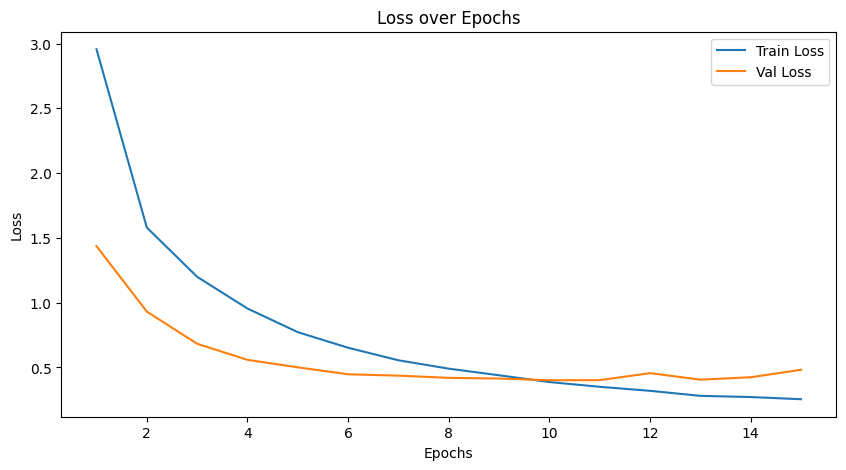

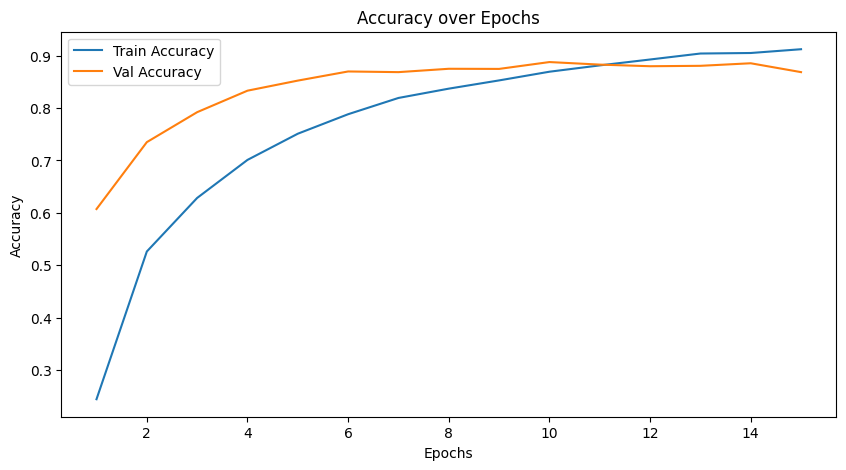

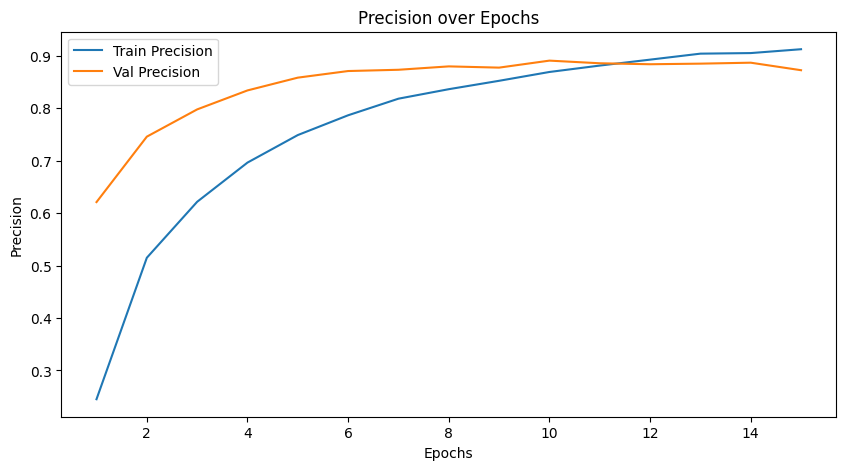

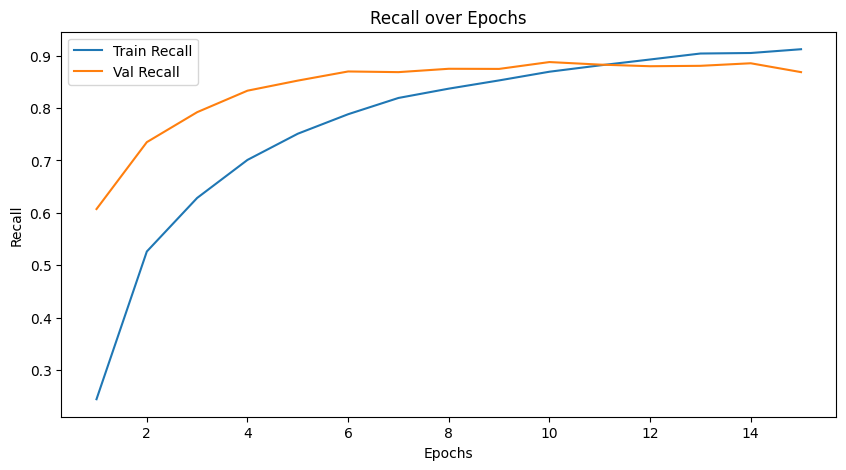

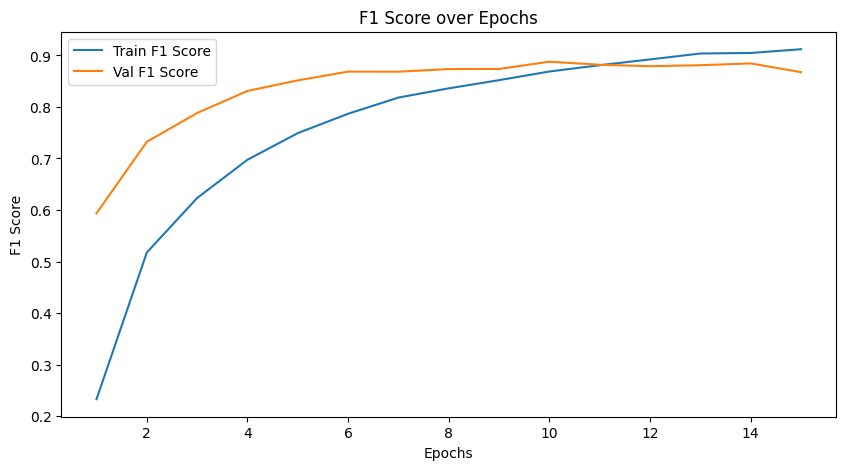

In [ ]:
# Plot
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    titles = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    y_labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    epochs = range(1, len(history['train']['loss']) + 1)

    for i, metric in enumerate(metrics):
        plt.figure(figsize=(10, 5))  # Set the figure size
        plt.plot(epochs, history['train'][metric], label='Train ' + titles[i])
        plt.plot(epochs, history['val'][metric], label='Val ' + titles[i])
        plt.title(titles[i] + ' over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(y_labels[i])
        plt.legend()
        plt.show()

plot_metrics(history)

### 4.7.2 Plot the resnet transfer learning training results

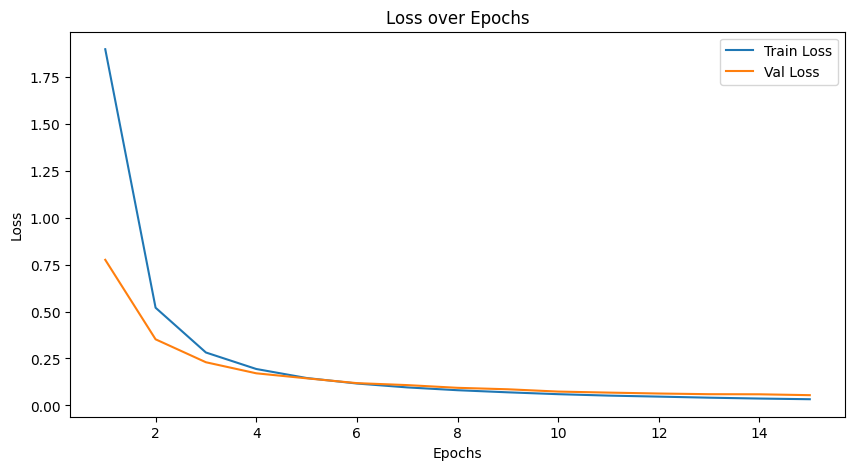

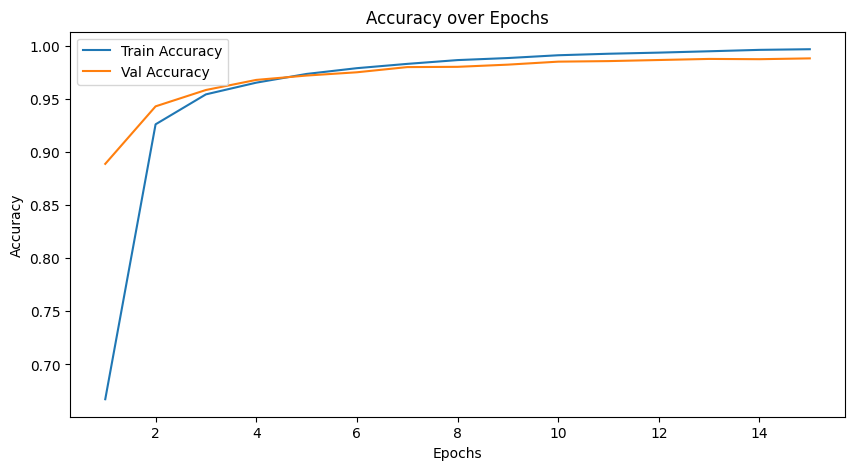

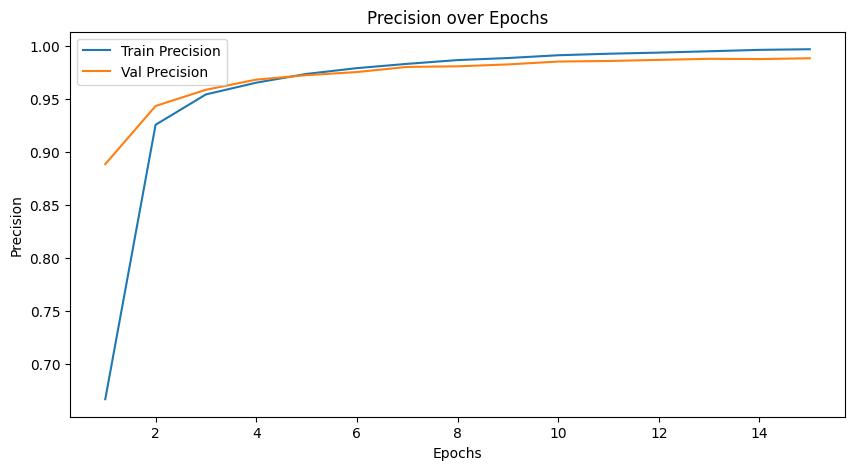

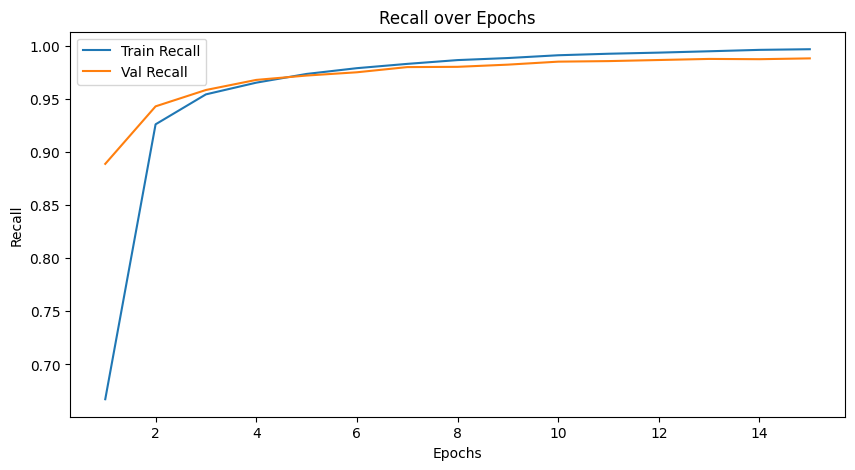

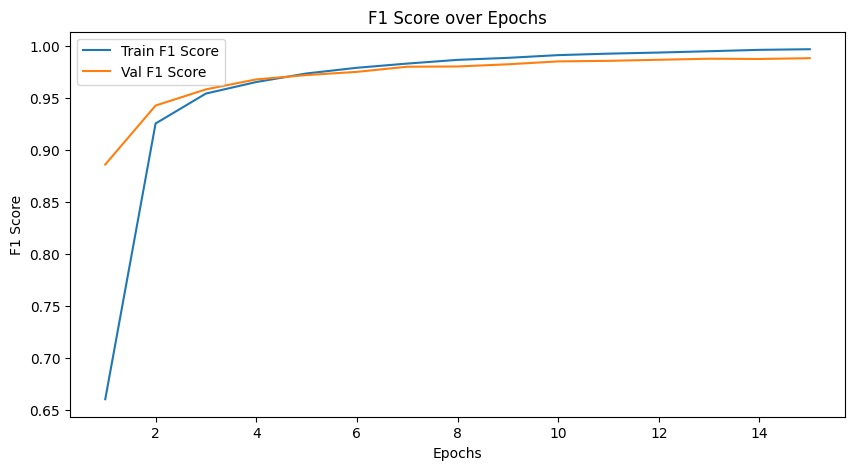

In [ ]:
# Plot
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    titles = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    y_labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    epochs = range(1, len(history['train']['loss']) + 1)

    for i, metric in enumerate(metrics):
        plt.figure(figsize=(10, 5))  # Set the figure size
        plt.plot(epochs, history['train'][metric], label='Train ' + titles[i])
        plt.plot(epochs, history['val'][metric], label='Val ' + titles[i])
        plt.title(titles[i] + ' over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(y_labels[i])
        plt.legend()
        plt.show()

plot_metrics(history)

### 4.7.3 Plot the resnet non-transfer learning training results

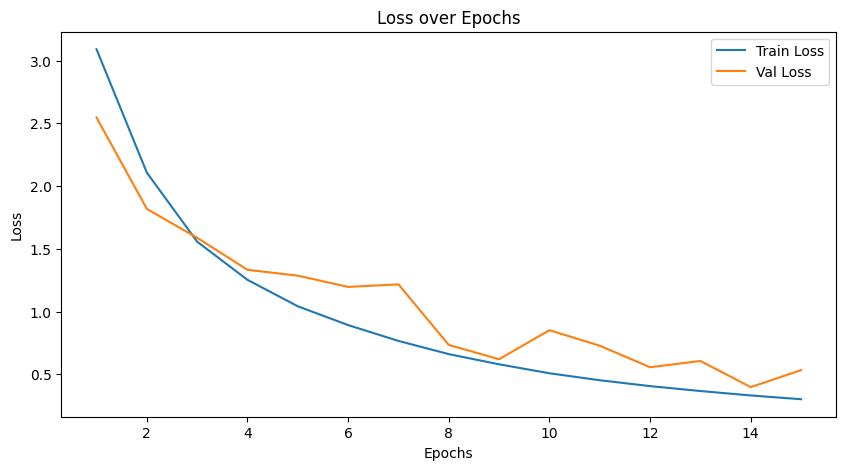

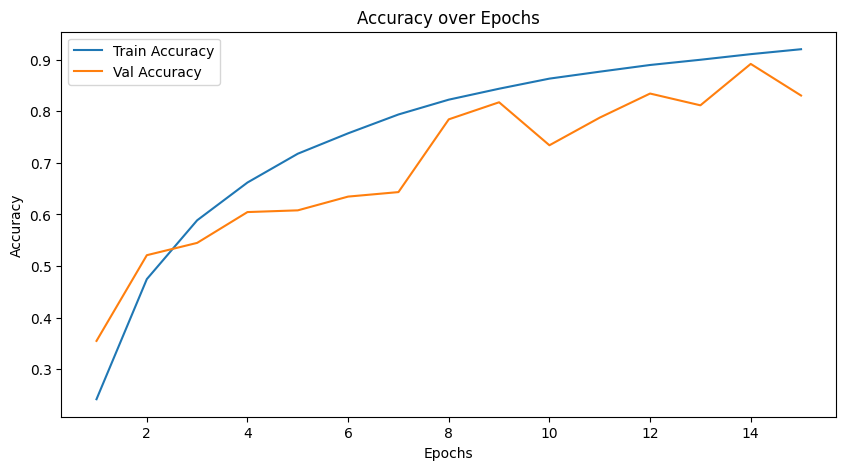

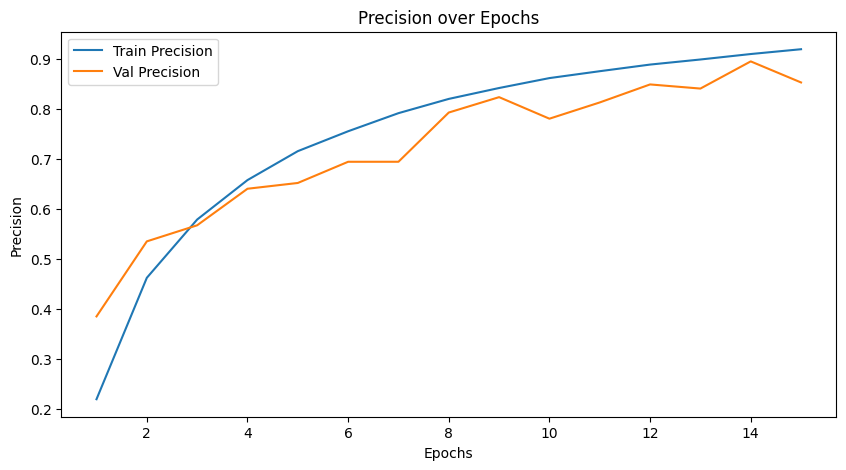

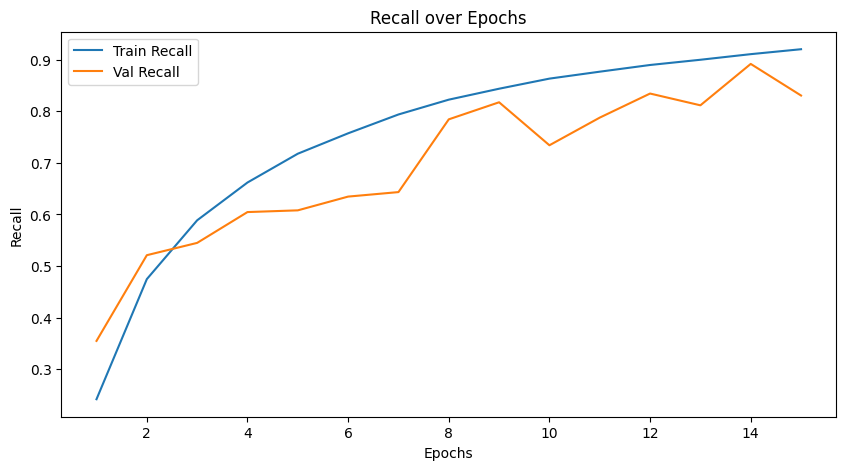

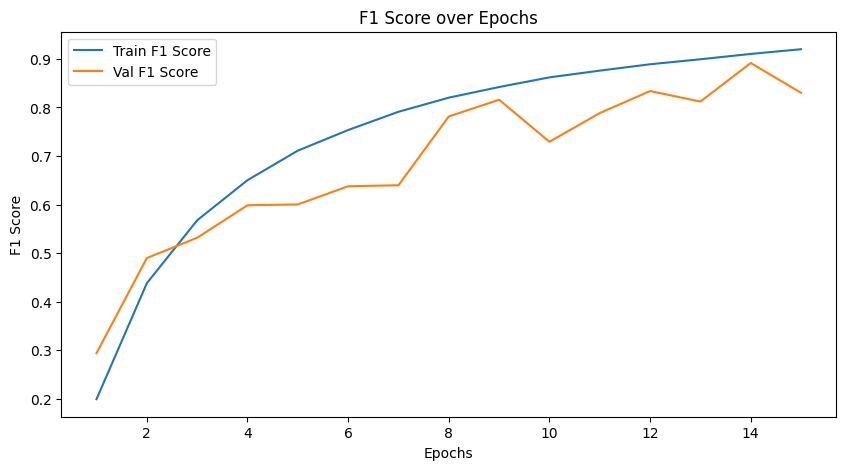

In [ ]:
# Plot
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    titles = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    y_labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    epochs = range(1, len(history['train']['loss']) + 1)

    for i, metric in enumerate(metrics):
        plt.figure(figsize=(10, 5))  # Set the figure size
        plt.plot(epochs, history['train'][metric], label='Train ' + titles[i])
        plt.plot(epochs, history['val'][metric], label='Val ' + titles[i])
        plt.title(titles[i] + ' over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(y_labels[i])
        plt.legend()
        plt.show()

plot_metrics(history)

### 4.7.4 Plot the vgg16 transfer learning training results

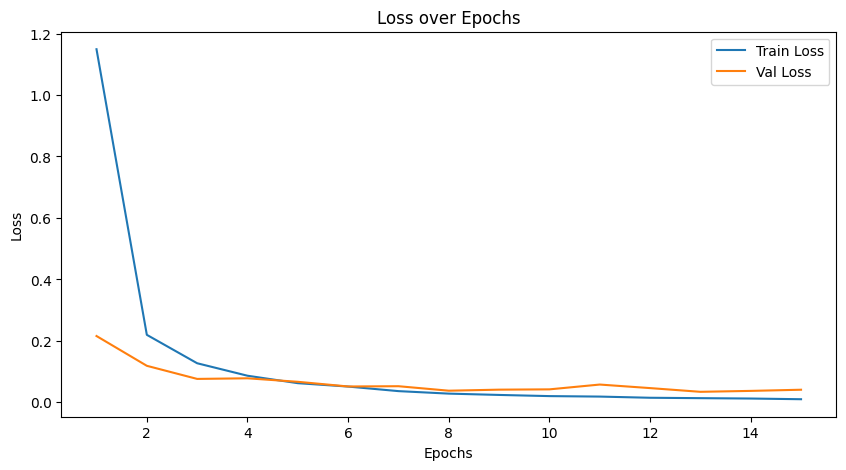

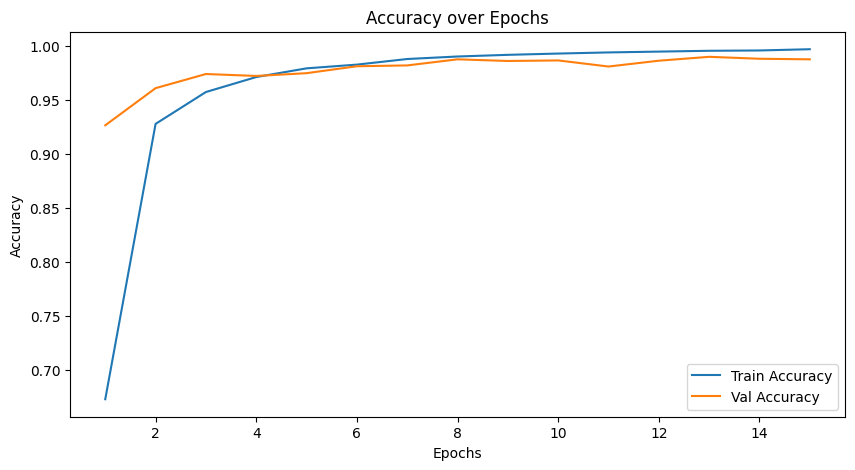

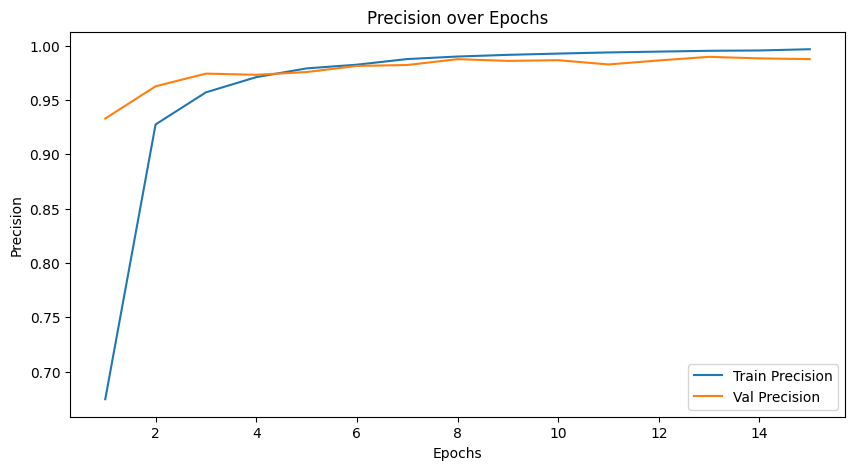

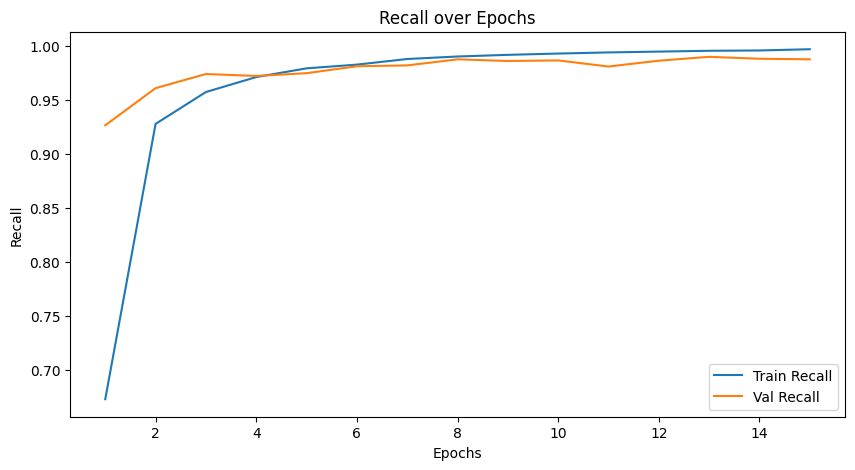

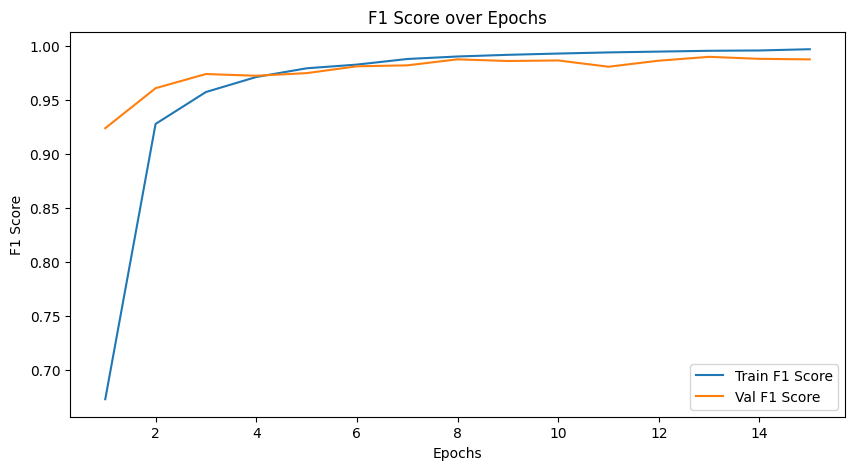

In [ ]:
# Plot
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    titles = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    y_labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    epochs = range(1, len(history['train']['loss']) + 1)

    for i, metric in enumerate(metrics):
        plt.figure(figsize=(10, 5))  # Set the figure size
        plt.plot(epochs, history['train'][metric], label='Train ' + titles[i])
        plt.plot(epochs, history['val'][metric], label='Val ' + titles[i])
        plt.title(titles[i] + ' over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(y_labels[i])
        plt.legend()
        plt.show()

plot_metrics(history)

### 4.7.5  Plot the vgg16 non-transfer learning training results

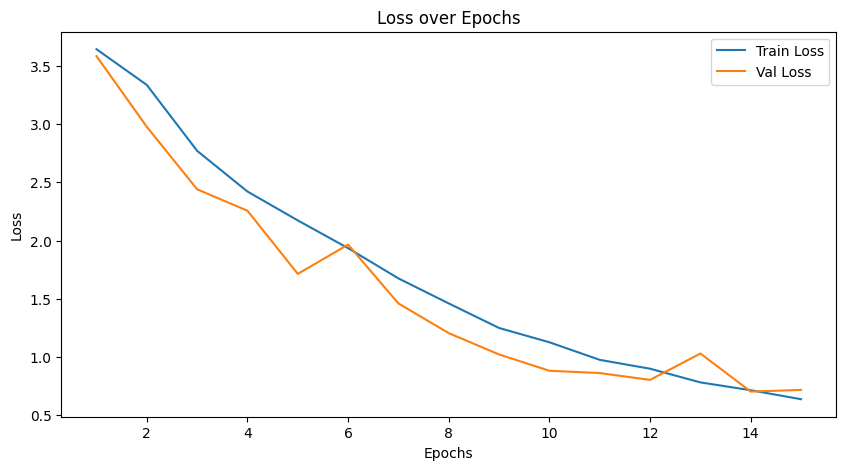

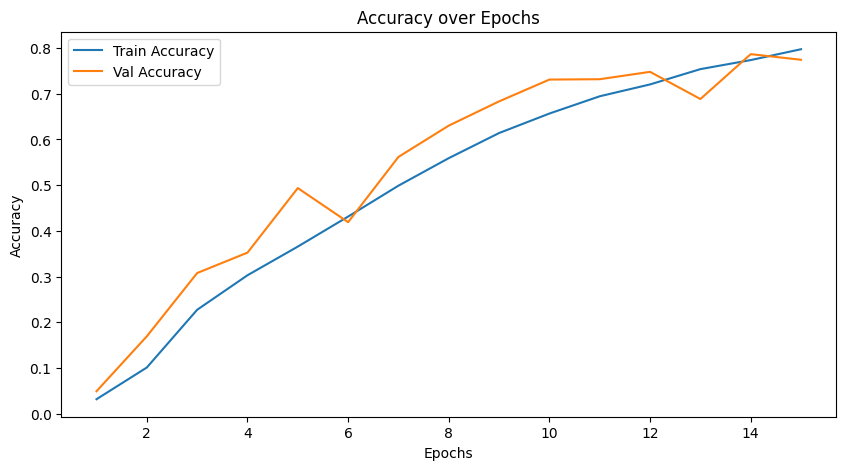

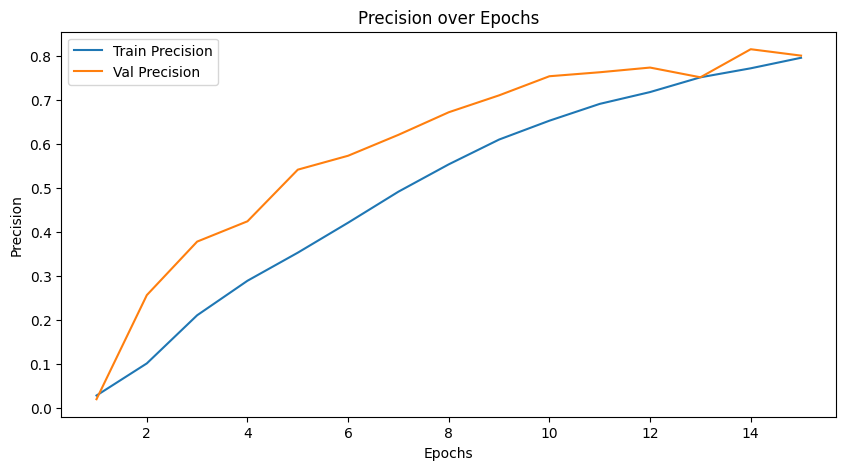

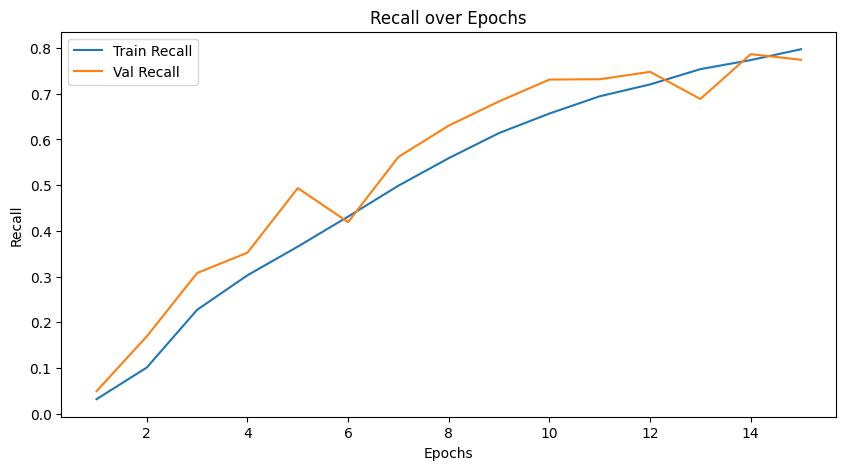

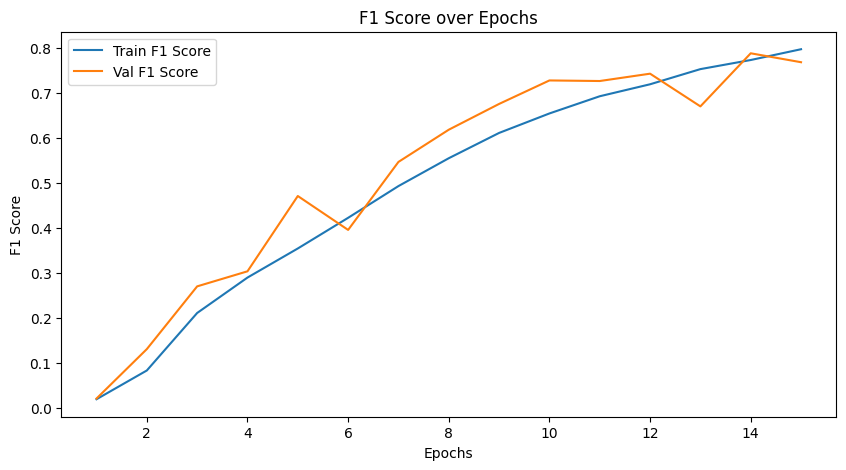

In [ ]:
# Plot
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    titles = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    y_labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    epochs = range(1, len(history['train']['loss']) + 1)

    for i, metric in enumerate(metrics):
        plt.figure(figsize=(10, 5))  # Set the figure size
        plt.plot(epochs, history['train'][metric], label='Train ' + titles[i])
        plt.plot(epochs, history['val'][metric], label='Val ' + titles[i])
        plt.title(titles[i] + ' over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(y_labels[i])
        plt.legend()
        plt.show()

plot_metrics(history)

## 4.8 Verify on the test set

In [ ]:
# Test the models
model.load_state_dict(torch.load('model_simple.pth'))
model.eval()
test_labels, test_preds = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(preds.cpu().numpy())

### 4.8.1 CNN test set results

Test Accuracy: 0.8749, Precision: 0.8792, Recall: 0.8749, F1 Score: 0.8744


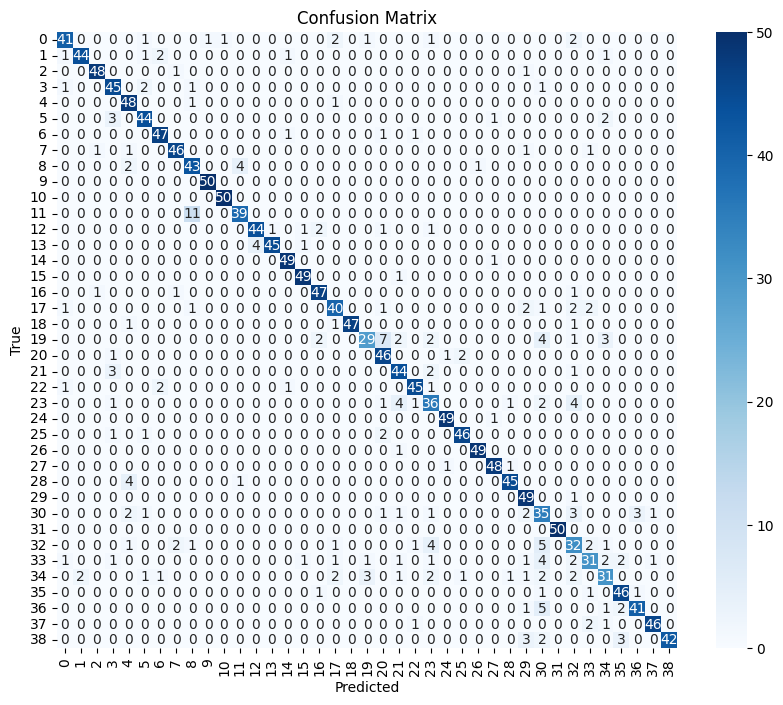

In [ ]:
# Calculate and print final test matrics
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted', zero_division=0)
f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=0)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4.8.2 Resnet18 test set results

Test Accuracy: 0.9872, Precision: 0.9876, Recall: 0.9872, F1 Score: 0.9871


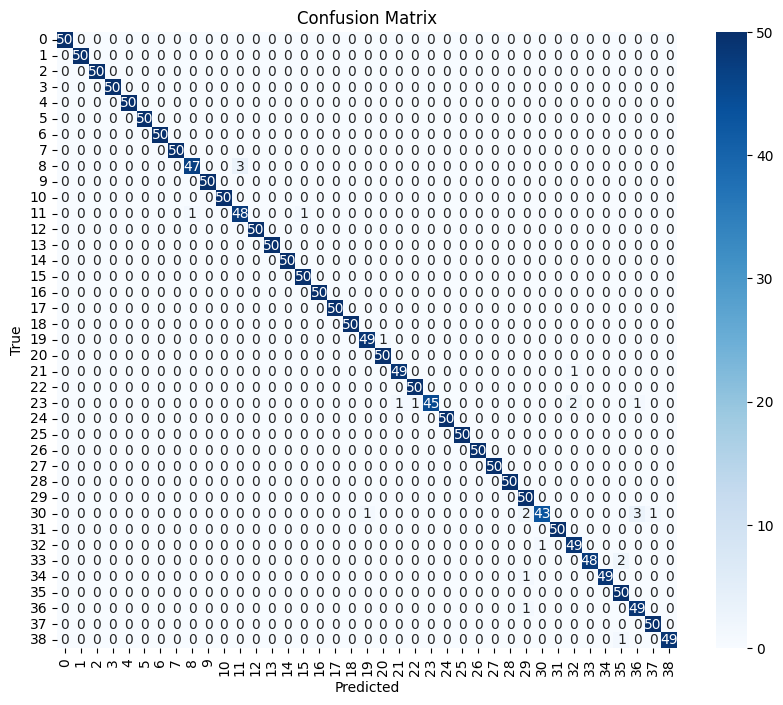

In [ ]:
# Calculate and print final test matrics
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted', zero_division=0)
f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=0)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4.8.3 Resnet18 non-transfer test set results

Test Accuracy: 0.8246, Precision: 0.8481, Recall: 0.8246, F1 Score: 0.8254


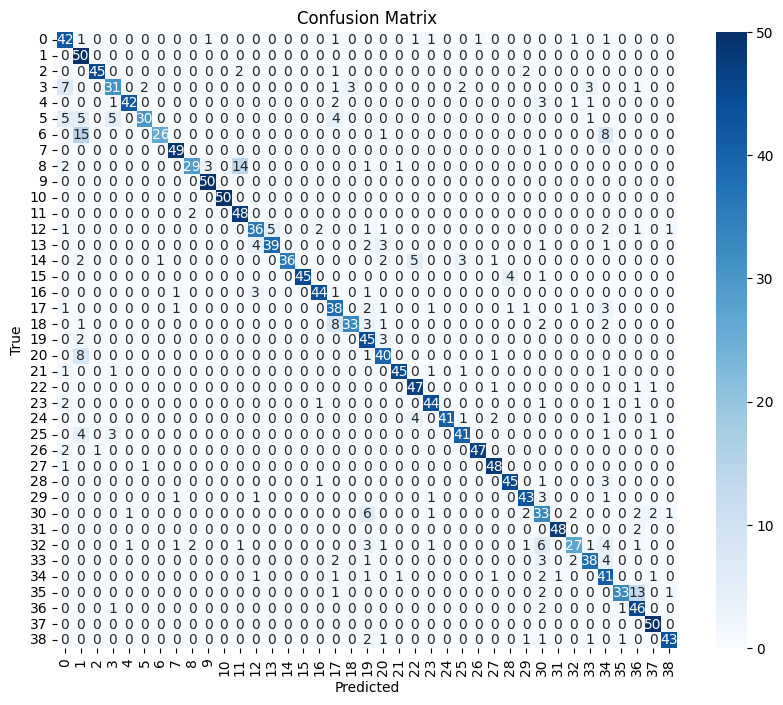

In [ ]:
# Calculate and print final test matrics
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted', zero_division=0)
f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=0)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4.8.4 Vgg16 test set results

Test Accuracy: 0.9892, Precision: 0.9895, Recall: 0.9892, F1 Score: 0.9892


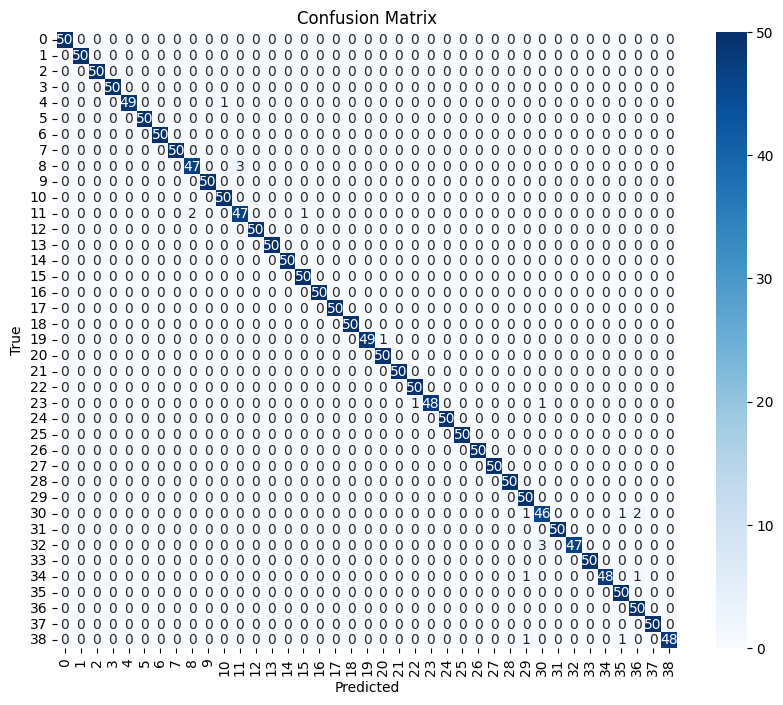

In [ ]:
# Calculate and print final test matrics
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted', zero_division=0)
f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=0)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4.8.5 Vgg16 non-transfer test set results

Test Accuracy: 0.7815, Precision: 0.8100, Recall: 0.7815, F1 Score: 0.7733


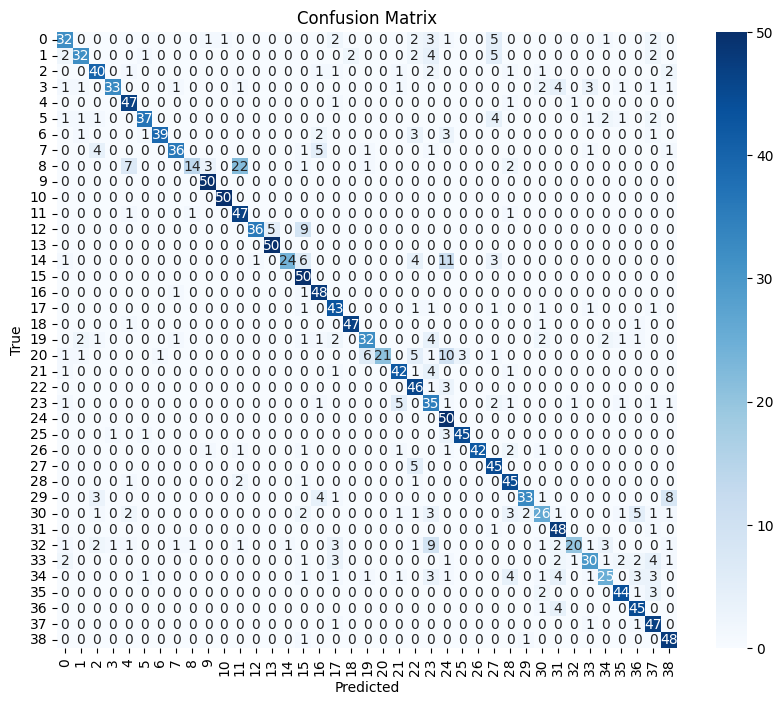

In [ ]:
# Calculate and print final test matrics
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted', zero_division=0)
f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=0)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 4.9 YOLOv10

Because the YOLO model requires a separate folder structure format, it is trained separately, ensuring that the dataset is the same as other models.

In [ ]:
# For academic integrity, this code is private. To reproduce, you need to clone:
# !git clone https://github.com/longsizhuo/9444_ass2/
!git clone https://github.com/THU-MIG/yolov10/
!pip install ultralytics
!pip install -q git+https://github.com/THU-MIG/yolov10.git

### 4.9.1 Convert the folder to what YOLO needs

In [ ]:
import os
import shutil
import cv2
from tqdm import tqdm

# # Define the dataset directory and output directory
dataset_dir = '/content/Plant_leave_diseases_dataset_resized'  # The root directory contains subdirectories train, val, and test
output_dir = '/content/datasets/yolo_temp'

# Category mapping, ensuring each category has a unique ID
classes = {
    'Apple___Apple_scab': 0,
    'Apple___Black_rot': 1,
    'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3,
    'Background_without_leaves': 4,
    'Blueberry___healthy': 5,
    'Cherry___healthy': 6,
    'Cherry___Powdery_mildew': 7,
    'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
    'Corn___Common_rust': 9,
    'Corn___healthy': 10,
    'Corn___Northern_Leaf_Blight': 11,
    'Grape___Black_rot': 12,
    'Grape___Esca_(Black_Measles)': 13,
    'Grape___healthy': 14,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 15,
    'Orange___Haunglongbing_(Citrus_greening)': 16,
    'Peach___Bacterial_spot': 17,
    'Peach___healthy': 18,
    'Pepper,_bell___Bacterial_spot': 19,
    'Pepper,_bell___healthy': 20,
    'Potato___Early_blight': 21,
    'Potato___healthy': 22,
    'Potato___Late_blight': 23,
    'Raspberry___healthy': 24,
    'Soybean___healthy': 25,
    'Squash___Powdery_mildew': 26,
    'Strawberry___healthy': 27,
    'Strawberry___Leaf_scorch': 28,
    'Tomato___Bacterial_spot': 29,
    'Tomato___Early_blight': 30,
    'Tomato___healthy': 31,
    'Tomato___Late_blight': 32,
    'Tomato___Leaf_Mold': 33,
    'Tomato___Septoria_leaf_spot': 34,
    'Tomato___Spider_mites Two-spotted_spider_mite': 35,
    'Tomato___Target_Spot': 36,
    'Tomato___Tomato_mosaic_virus': 37,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 38
}

# Create Output Directory
for subdir in ['images', 'labels']:
    for phase in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_dir, subdir, phase), exist_ok=True)

# Traverse each data set partition (train, val, test)
img_counter = 0
for phase in ['train', 'val', 'test']:
    phase_dir = os.path.join(dataset_dir, phase)
    for label, class_id in tqdm(classes.items()):
        label_dir = os.path.join(phase_dir, label)
        if os.path.isdir(label_dir):
            img_files = [f for f in os.listdir(label_dir) if f.lower().endswith('.jpg') or f.lower().endswith('.png')]

            for img_file in img_files:
                img_file_lower = img_file.lower()
                img_path = os.path.join(label_dir, img_file)
                img = cv2.imread(img_path)
                h, w, _ = img.shape

                # Convert png to jpg
                if img_file_lower.endswith('.png'):
                    img_file_lower = img_file_lower.replace('.png', '.jpg')
                    img_path = os.path.join(label_dir, img_file_lower)
                    cv2.imwrite(img_path, img)

                # Generate a unique name for each file
                unique_img_name = f'image_{img_counter}.jpg'
                unique_lbl_name = f'image_{img_counter}.txt'
                img_counter += 1

                yolo_label_path = os.path.join(output_dir, 'labels', phase, unique_lbl_name)
                with open(yolo_label_path, 'w') as f:
                    x_center = 0.5
                    y_center = 0.5
                    width = 1.0
                    height = 1.0
                    f.write(f'{class_id} {x_center} {y_center} {width} {height}\n')

                yolo_img_path = os.path.join(output_dir, 'images', phase, unique_img_name)
                shutil.copy(img_path, yolo_img_path)

### 4.9.2 YOLOv10 training

In [ ]:
from ultralytics import YOLOv10
if __name__ == '__main__':
    model = YOLOv10.from_pretrained('jameslahm/yolov10n')
    model.train(data='/content/drive/MyDrive/9444 Group Project/leaf_disease.yaml', epochs=15, batch=64, imgsz=256)

### 4.9.3 YOLOv10 Result:



epoch             train/box_om             train/cls_om  \
0                        1                  1.11900                  4.11260   
1                        2                  0.15807                  1.77260   
2                        3                  0.09991                  1.06330   
3                        4                  0.07948                  0.69516   
4                        5                  0.06901                  0.51183   
5                        6                  0.06048                  0.38891   
6                        7                  0.05405                  0.31636   
7                        8                  0.04879                  0.26128   
8                        9                  0.04508                  0.22191   
9                       10                  0.04080                  0.18787   

              train/dfl_om             train/box_oo             train/cls_oo  \
0                  2.46540                  0.94649                  9.55460   
1                  1.01550                  0.16725                  2.25940   
2                  0.94881                  0.10528                  1.23140   
3                  0.93246                  0.08387                  0.82060   
4                  0.92415                  0.07273                  0.60841   
5                  0.91823                  0.06278                  0.46279   
6                  0.91461                  0.05586                  0.37222   
7                  0.91104                  0.05004                  0.30640   
8                  0.90924                  0.04572                  0.25527   
9                  0.90737                  0.04078                  0.21228   

              train/dfl_oo     metrics/precision(B)        metrics/recall(B)  \
0                  2.44660                  0.28757                  0.17566   
1                  1.01330                  0.43244                  0.48467   
2                  0.94450                  0.61845                  0.65840   
3                  0.92898                  0.71120                  0.80112   
4                  0.92115                  0.89132                  0.88950   
5                  0.91532                  0.91173                  0.91090   
6                  0.91207                  0.93998                  0.93093   
7                  0.90841                  0.95957                  0.95901   
8                  0.90665                  0.96091                  0.95716   
9                  0.90474                  0.97343                  0.96634   

          metrics/mAP50(B)      metrics/mAP50-95(B)               val/box_om  \
0                  0.12796                  0.11041                  0.66213   
1                  0.45033                  0.40625                  0.45281   
2                  0.70916                  0.66023                  0.35361   
3                  0.84631                  0.80193                  0.31469   
4                  0.94850                  0.89874                  0.31024   
5                  0.96676                  0.91972                  0.29161   
6                  0.97466                  0.93474                  0.27562   
7                  0.98510                  0.93921                  0.27352   
8                  0.98551                  0.94781                  0.26332   
9                  0.98871                  0.94860                  0.26198   

                val/cls_om               val/dfl_om               val/box_oo  \
0                  2.38260                  1.13160                  0.70982   
1                  1.26430                  0.65577                  0.52143   
2                  0.76898                  0.49599                  0.42946   
3                  0.50908                  0.42447                  0.39574   
4                  0.39108                  0.41546                  0.39599   
5                

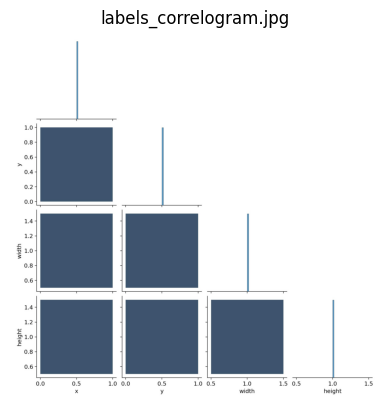

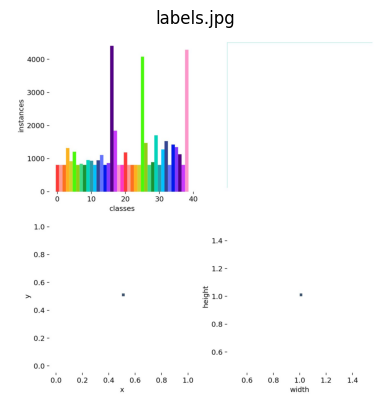

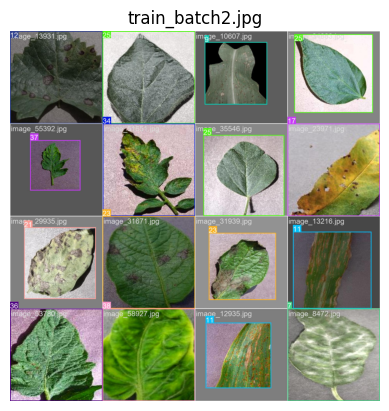

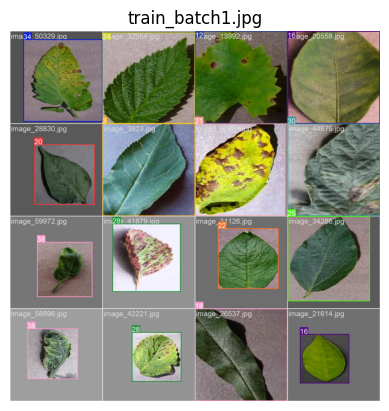

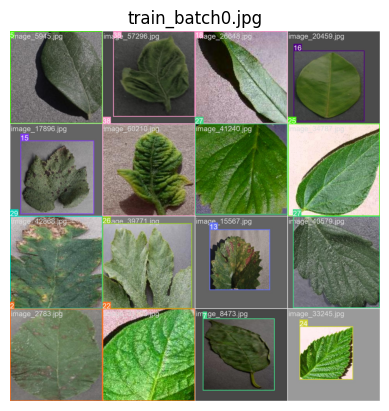

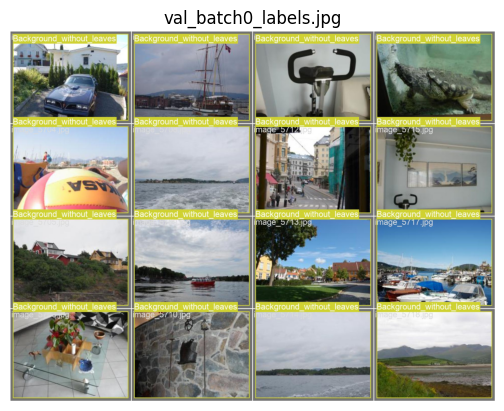

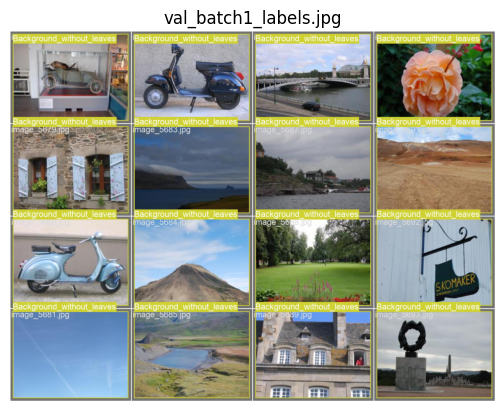

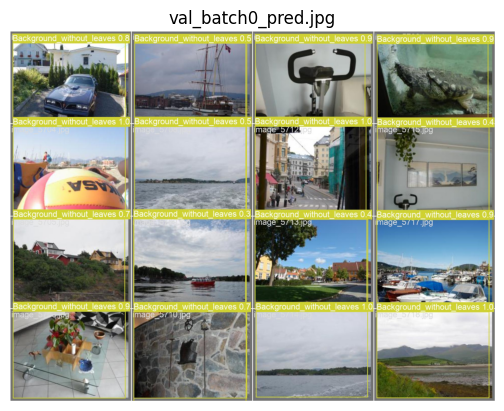

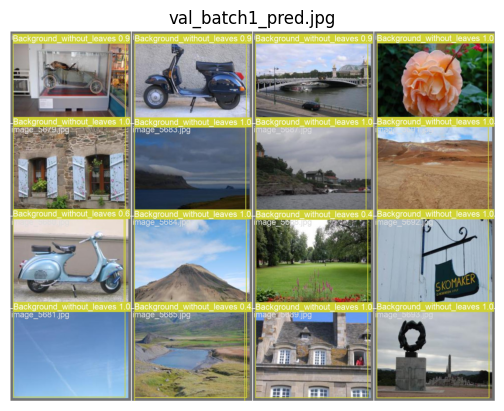

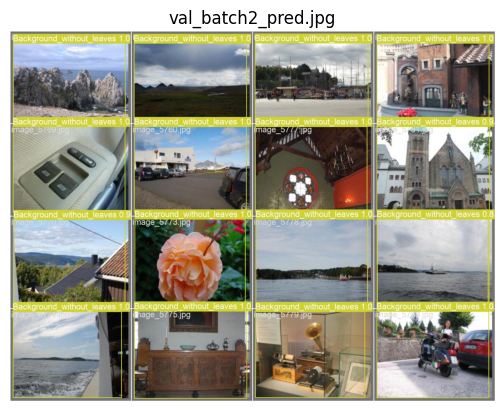

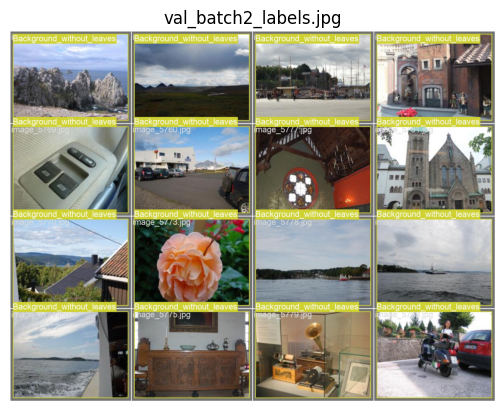

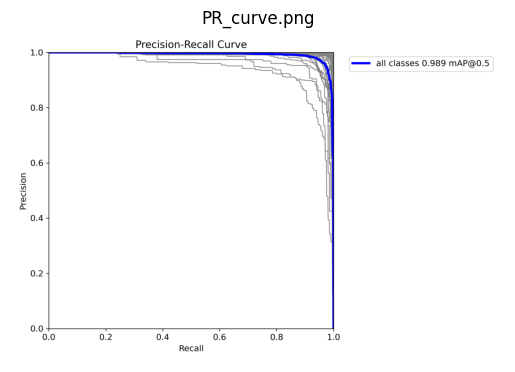

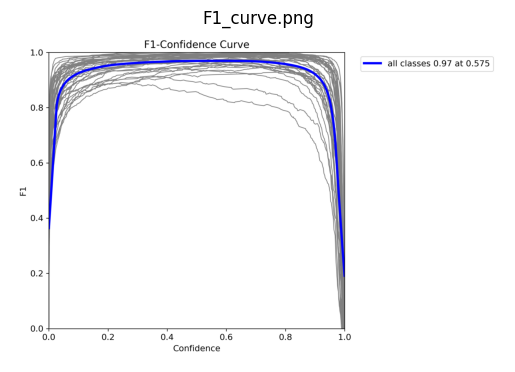

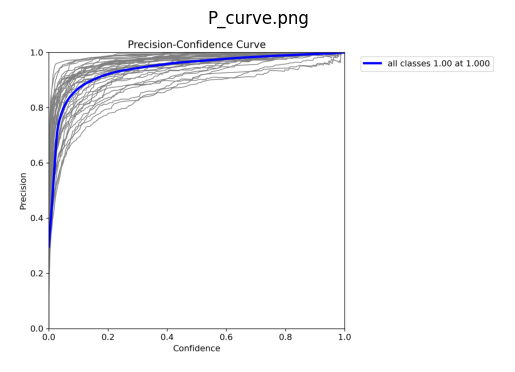

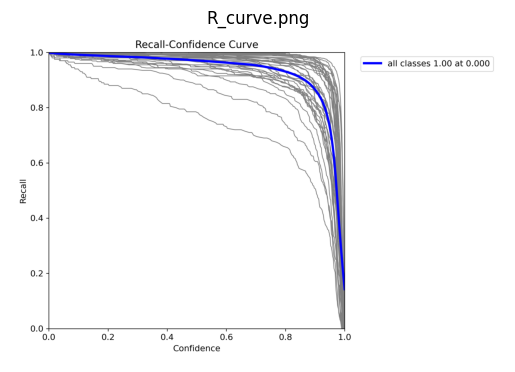

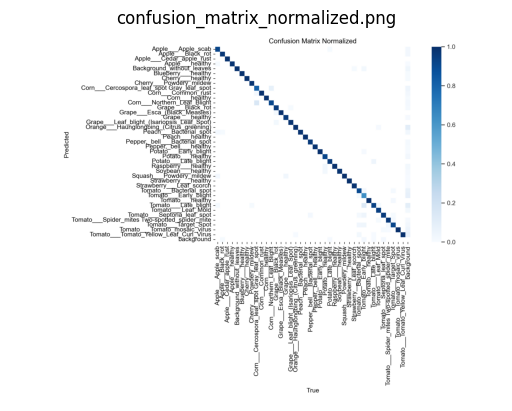

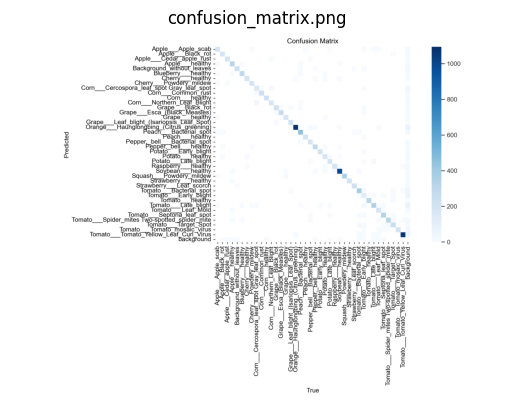

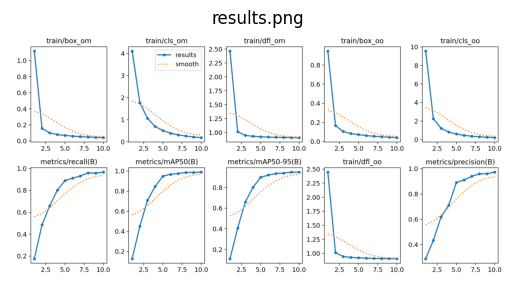

In [ ]:
# All result have upload in Google Drive,
# YOLOv10 is the newest model of YOLO, it is very complexed to reproduce in a new environment such as colab.
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from IPython.display import display

folder_path = '/content/drive/MyDrive/9444 Group Project/yolov10_train15'
csv_file_path = '/content/drive/MyDrive/9444 Group Project/yolov10_train15/results.csv'
df = pd.read_csv(csv_file_path)
display(df)

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(image_path)
    plt.figure()
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

## 4.10 Majority voting

In [ ]:
# Import yolo
# After running, if there is an error in the subsequent code, you need to refresh it with 'CTRL + M + .'
!pip install ultralytics
!pip install -q git+https://github.com/THU-MIG/yolov10.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Total test images: 1950


100%|██████████| 1950/1950 [00:47<00:00, 40.85it/s]


Test Accuracy: 0.99179
Precision: 0.99192
Recall: 0.99179
F1 Score: 0.99172
Incorrectly classified images:
Image: /content/Plant_leave_diseases_dataset_resized/test/tomato___tomato_yellow_leaf_curl_virus/image (4338).jpg, True Class: tomato___tomato_yellow_leaf_curl_virus, Predicted Class: tomato___spider_mites two-spotted_spider_mite
Image: /content/Plant_leave_diseases_dataset_resized/test/corn___cercospora_leaf_spot gray_leaf_spot/image (99).jpg, True Class: corn___cercospora_leaf_spot gray_leaf_spot, Predicted Class: corn___northern_leaf_blight
Image: /content/Plant_leave_diseases_dataset_resized/test/corn___cercospora_leaf_spot gray_leaf_spot/image (367).jpg, True Class: corn___cercospora_leaf_spot gray_leaf_spot, Predicted Class: corn___northern_leaf_blight
Image: /content/Plant_leave_diseases_dataset_resized/test/corn___cercospora_leaf_spot gray_leaf_spot/image (384).jpg, True Class: corn___cercospora_leaf_spot gray_leaf_spot, Predicted Class: corn___northern_leaf_blight
Image: 

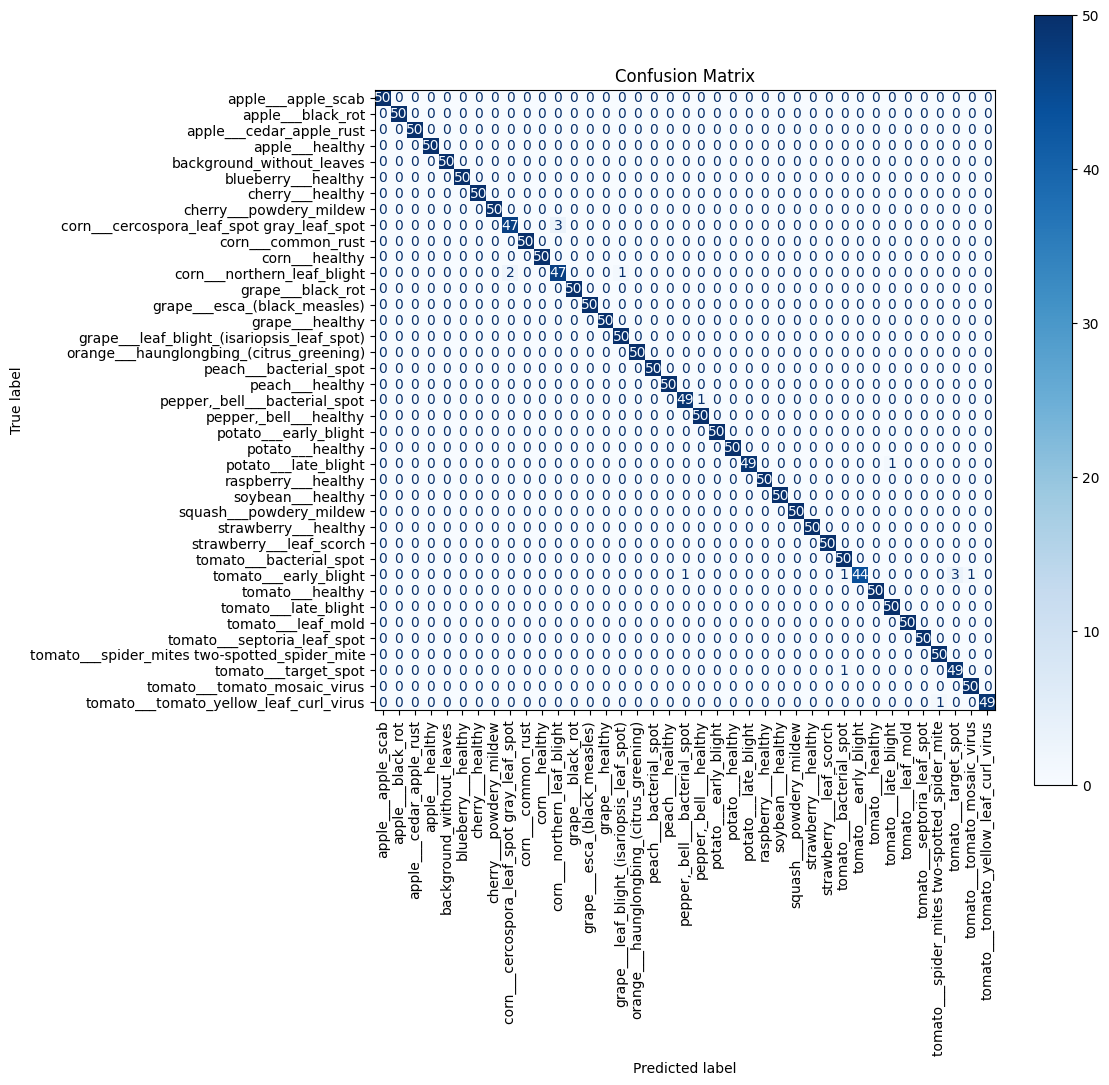

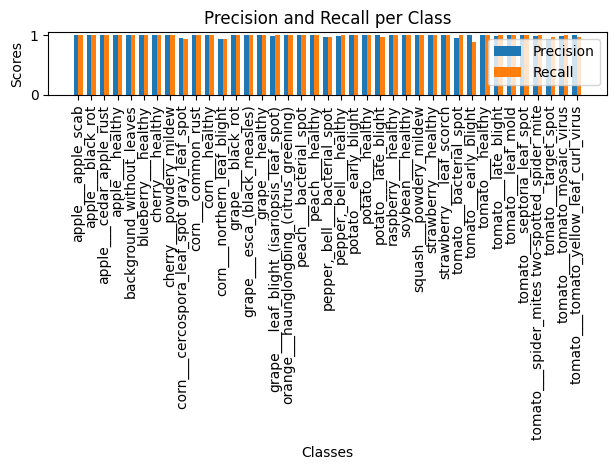

In [ ]:
import os
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from torch import nn, optim
from ultralytics import YOLOv10 as YOLO
import torch
from torchvision import transforms, models
from PIL import Image
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Defining Category Dictionaries
classes = {
    'Apple___Apple_scab': 0,
    'Apple___Black_rot': 1,
    'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3,
    'Background_without_leaves': 4,
    'Blueberry___healthy': 5,
    'Cherry___healthy': 6,
    'Cherry___Powdery_mildew': 7,
    'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
    'Corn___Common_rust': 9,
    'Corn___healthy': 10,
    'Corn___Northern_Leaf_Blight': 11,
    'Grape___Black_rot': 12,
    'Grape___Esca_(Black_Measles)': 13,
    'Grape___healthy': 14,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 15,
    'Orange___Haunglongbing_(Citrus_greening)': 16,
    'Peach___Bacterial_spot': 17,
    'Peach___healthy': 18,
    'Pepper,_bell___Bacterial_spot': 19,
    'Pepper,_bell___healthy': 20,
    'Potato___Early_blight': 21,
    'Potato___healthy': 22,
    'Potato___Late_blight': 23,
    'Raspberry___healthy': 24,
    'Soybean___healthy': 25,
    'Squash___Powdery_mildew': 26,
    'Strawberry___healthy': 27,
    'Strawberry___Leaf_scorch': 28,
    'Tomato___Bacterial_spot': 29,
    'Tomato___Early_blight': 30,
    'Tomato___healthy': 31,
    'Tomato___Late_blight': 32,
    'Tomato___Leaf_Mold': 33,
    'Tomato___Septoria_leaf_spot': 34,
    'Tomato___Spider_mites Two-spotted_spider_mite': 35,
    'Tomato___Target_Spot': 36,
    'Tomato___Tomato_mosaic_virus': 37,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 38
}

device = "cuda" if torch.cuda.is_available() else "cpu"
classes = {key.lower(): value for key, value in classes.items()}
inverse_classes = {value: key for key, value in classes.items()}  # Reverse dictionary to get category names from labels


# Defining the simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Loading the CNN model
cnn_model = SimpleCNN(num_classes=39).to(device)
cnn_model.load_state_dict(torch.load('/content/drive/MyDrive/9444 Group Project/cnn_model_simple.pth'))
cnn_model.eval()

# Loading the YOLO model
yolo_model = YOLO('/content/drive/MyDrive/9444 Group Project/yolov10_train15_best.pt')

# Loading the Resnet model
model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 39)
model.load_state_dict(torch.load('/content/drive/MyDrive/9444 Group Project/new_resnet_model_simple.pth'))
model = model.to(device)
model.eval()

# Loading the Vgg model
vgg_model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
num_vgg_1_features = vgg_model.classifier[6].in_features
vgg_model.classifier[6] = nn.Linear(num_vgg_1_features, 39)
vgg_model.load_state_dict(torch.load('/content/drive/MyDrive/9444 Group Project/vgg_model_simple.pth'))
vgg_model = vgg_model.to(device)
vgg_model.eval()

# Loading the test suite
test_images_dir = '/content/Plant_leave_diseases_dataset_resized/test'

# Define image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Read all image paths and true categories in the test set
all_files = []
for root, dirs, files in os.walk(test_images_dir):
    for file in files:
        if file.lower().endswith('.jpg'):
            image_path = os.path.join(root, file)
            class_name = os.path.basename(root)
            class_idx = classes[class_name.lower()]
            all_files.append((image_path, class_idx))

length_allfiles = len(all_files)
print(f"Total test images: {length_allfiles}")

true_labels = []
predicted_labels = []
truly_test_images = 0
incorrect_images = []  # The image path used to store errors

for image_path, true_class in tqdm(all_files):
    input_image = Image.open(image_path).convert('RGB')
    input_tensor = transform(input_image).unsqueeze(0).to(device)

    # Using YOLO model to make predictions
    try:
        yolo_prediction = yolo_model(image_path, verbose=False)
        yolo_predicted_class = int(yolo_prediction[0].boxes.data[0, 5].item())
    except IndexError:
        yolo_predicted_class = 4  # Assume the classification is 4

    # Using Resnet model to make predictions
    with torch.no_grad():  # Disable gradient calculation to reduce memory usage
        resnet_prediction = model(input_tensor)
        resnet_predicted_class = resnet_prediction.argmax(dim=1).item()  # Get the predicted category

    # Using CNN model for prediction
    with torch.no_grad():
        cnn_prediction = cnn_model(input_tensor)
        cnn_predicted_class = cnn_prediction.argmax(dim=1).item()

    # Using VGG model for prediction
    with torch.no_grad():
        vgg_1_prediction = vgg_model(input_tensor)
        vgg_1_predicted_class = vgg_1_prediction.argmax(dim=1).item()

    # Put the prediction results into a list
    predictions = [resnet_predicted_class,
                   yolo_predicted_class,
                   vgg_1_predicted_class,
                   cnn_predicted_class,
                   ]
    # Use Counter to count the number of predictions for each category
    vote_count = Counter(predictions)

    # Find the category with the most votes as the final prediction result
    final_prediction = vote_count.most_common(1)[0][0]

    if true_class == final_prediction:
        truly_test_images += 1
    else:
        # Add the wrong image path, true category and predicted category
        incorrect_images.append((image_path, true_class, final_prediction))

    true_labels.append(true_class)
    predicted_labels.append(final_prediction)

# Calculate accuracy
test_accuracy = truly_test_images / length_allfiles
print(f"Test Accuracy: {test_accuracy:.5f}")

# Calculate precision, recall and F1 score
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Print the image path and error information of the error
print("Incorrectly classified images:")
for img_path, true_class, pred_class in incorrect_images:
    print(f"Image: {img_path}, True Class: {inverse_classes[true_class]}, Predicted Class: {inverse_classes[pred_class]}")


# Generate and display a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(classes.keys()))

# Using GridSpec to increase spacing
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(1, 1, wspace=0.4, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])
disp.plot(cmap=plt.cm.Blues, ax=ax0)
ax0.set_xticks(np.arange(len(classes)))
ax0.set_xticklabels(list(classes.keys()), rotation=90)
plt.title("Confusion Matrix")

# Generate a bar chart of precision and recall
precision_per_class = precision_score(true_labels, predicted_labels, average=None, labels=range(len(classes)))
recall_per_class = recall_score(true_labels, predicted_labels, average=None, labels=range(len(classes)))

x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, precision_per_class, width, label='Precision')
rects2 = ax.bar(x + width / 2, recall_per_class, width, label='Recall')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall per Class')
ax.set_xticks(x)
ax.set_xticklabels(list(classes.keys()), rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


# 5 Results

## 5.1 Analysis of Model Performance

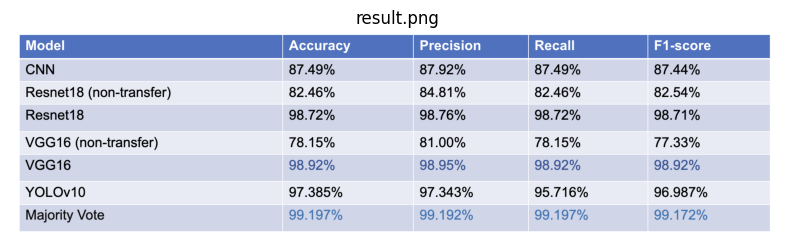

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/sample_data/result.png'
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

img = mpimg.imread(image_path)
ax.imshow(img)
ax.axis('off')  # Hide the axis
ax.set_title(image_path.split('/')[-1])

plt.show()

  The figure above summarizes all the models and their results. From the figure, we can see that the worst-performing model is VGG16 (non-transfer), while the best single model is VGG16. The majority voting method combines the predictions of multiple models, reducing the error of individual models, and thus achieves the best results.

## 5.2 Detailed Analysis of Each Model

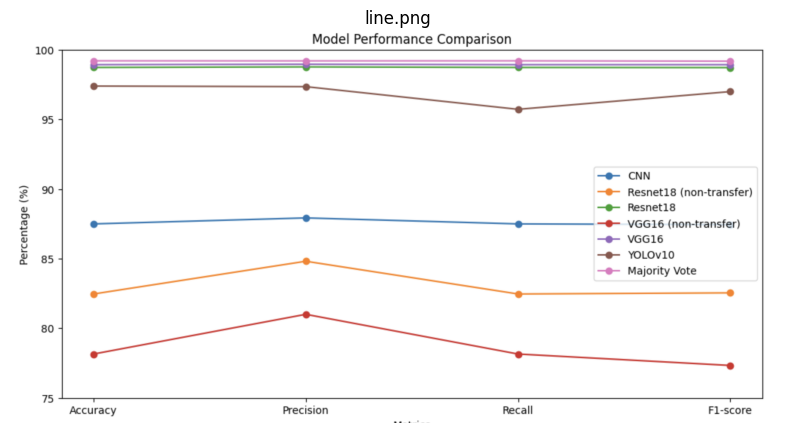

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/sample_data/line.png'
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
img = mpimg.imread(image_path)
ax.imshow(img)
ax.axis('off')
ax.set_title(image_path.split('/')[-1])

plt.show()


**CNN Model**  
Despite its simple structure, the CNN model performs well in handling image data. This model shows high accuracy and precision in analyzing leaf diseases, with all metrics reaching around 87%, outperforming VGG16 (non-transfer) and Resnet18 (non-transfer).

**Resnet18 (non-transfer)**  
Resnet18 is a deep residual network that effectively mitigates the vanishing gradient problem. However, the Resnet18 without pre-trained weights needs to learn all features from scratch, resulting in poorer performance, with all metrics reaching around 82%.

**Resnet18**  
The pre-trained Resnet18 performs significantly better, with all metrics reaching around 98.8%, making it the second-best single model after VGG16.

**VGG16 (non-transfer)**  
Although VGG16 is a deep convolutional neural network with many layers and parameters, the VGG16 (non-transfer) performs poorly because it needs to learn all features from scratch, resulting in metrics only around 78%.

**VGG16**  
The VGG16 with pre-trained weights is the best single model. The pre-trained VGG16 has learned rich feature representations, and all metrics reach around 98.9%.

**YOLO**  
The YOLO (You Only Look Once) model is primarily used for object detection tasks. Using the YOLO model for this task is a novel attempt. Although YOLO's performance in classification tasks is not as good as specialized classification models (such as ResNet18 and VGG16), it still achieves good results in leaf disease classification, with all metrics reaching around 96%.

**Majority Vote**  
The majority voting method combines the predictions of multiple models and selects the final prediction category through a voting mechanism. Since different models may perform differently on different samples, combining the predictions of multiple models can effectively reduce the error of individual models and improve the overall prediction accuracy and robustness. Therefore, the majority voting method achieves the best results, with all metrics reaching around 99%.


## 5.3 Comparison of Existing Methods in Literature


We refer to the paper by B et al., which uses a pre-trained CNN with a GoogLeNet architecture, and the accuracy of each crop ranges from 75% to 100%. This variation is caused by differences in the number of images, the number of diseases, the diversity of diseases, and the resulting difficulty level. The overall accuracy using a single lesion and spot is 94%. Our majority voting model has an accuracy of 99.197%, and the VGG16 model has an accuracy of 98.92%, both of which are better than previous references.

In the leaf disease classification task, one of the state-of-the-art models is EfficientNetV2. According to the research of J et al., EfficientNetV2 has an accuracy of more than 98% on multiple datasets. In the specific leaf disease classification task, EfficientNetV2 has an accuracy of 99%. This model introduces more efficient training strategies such as progressive learning rate scheduling and data augmentation techniques. Compared with them, our VGG16 model has lower training efficiency and longer training time.


## 5.4 Practical application of our models



In summary, our model results are good enough to be deployed in practical applications. Both majority voting and VGG16 achieved good results. The majority voting results reached about 99%. After using the pre-trained weights, the VGG16 model also reached about 98.9%, which shows that it has high reliability and accuracy in practical applications.

# 6. Discussion

## 6.1 Insight about System Performance


1). **Pre-trained vs Non-pre-trained Models:**
   Our experiments clearly demonstrate the advantage of using pre-trained models. The pre-trained VGG16 model achieved an accuracy of 98.92%, significantly outperforming the non-pre-trained VGG16 model which only reached an accuracy of 78%. This substantial difference highlights the importance of transfer learning in leaf disease classification tasks, where the pre-trained weights capture general image features that are highly beneficial for our specific task.

2). **Single Models vs Ensemble Approach:**
   While individual models performed well, our majority voting ensemble method showed superior performance. This demonstrates that combining diverse models can lead to more robust and accurate predictions, as different models may excel at recognizing different aspects of leaf diseases.

3). **Model Complexity and Performance:**
   Interestingly, the more complex models did not always yield better results. For instance, the simpler CNN model (87% accuracy) outperformed the more complex Resnet18 (non-transfer, 82% accuracy). This suggests that model architecture alone does not guarantee better performance.

4). **Specialized vs General Models:**
   The YOLO model, primarily designed for object detection, performed surprisingly well with 96% accuracy in our classification task. This indicates that models specialized for related tasks can be effectively adapted for leaf disease classification, potentially bringing unique strengths to the ensemble.

## 6.2 Strengths and Weaknesses

**Strengths:**  
- **High accuracy:** The majority voting model achieved a high accuracy of 99.197%, and the VGG16 model achieved an accuracy of 98.92%.
- **Robustness:** The majority voting mechanism combines the predictions of multiple models, improving overall prediction accuracy and robustness.

**Weaknesses:**  
- **Misclassifications:** Despite the high accuracy, there are still some misclassifications.

## 6.3 Analysis of Misclassifications


**Corn Disease Misclassification:**  
- **Observation:** Upon examining the training set images of `corn___cercospora_leaf_spot gray_leaf_spot`, it is observed that early-stage lesions often have numerous small yellow or orange spots, about 1-5 mm in size. In the later stages, the lesions become brown to dark brown, narrow, and rectangular, parallel to the leaf veins.
- **Comparison:** In contrast, `northern_leaf_blight` lesions are typically oval or spindle-shaped, starting small and expanding to 2.5-15 cm in length. The center of the lesion is gray-green to brown, with dark green or brown edges. The lesions may expand between the leaf veins, forming larger irregular patches.
- **Misclassification Reason:** The three below misclassified images of `leaf_spot gray_leaf_spot` had fewer lesions and did not exhibit the characteristic small spots or narrow rectangular shape, making them more likely to be classified as `northern_leaf_blight`.



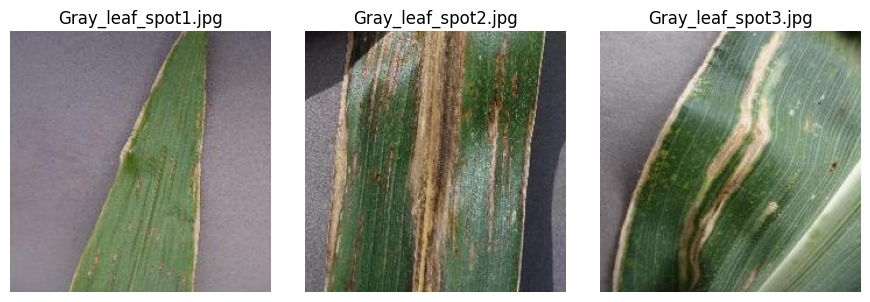

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the images
image_paths = [
    '/content/sample_data/Gray_leaf_spot1.jpg',
    '/content/sample_data/Gray_leaf_spot2.jpg',
    '/content/sample_data/Gray_leaf_spot3.jpg'
]
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, image_path in zip(axes, image_paths):
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide the axis
    ax.set_title(image_path.split('/')[-1])
plt.show()

**Tomato Disease Misclassification:**  
- **Observation:** In the training set images of `tomato___early_blight`, the lesions are usually large, with a diameter of 1-2 cm. In severe cases, the lesions can merge, affecting the entire leaf. The center of the lesion is typically dark brown or black, with lighter edges.
- **Comparison:** `Target_spot` lesions are generally smaller, with a diameter usually less than 1 cm. The center of the lesion is gray or brown, with dark brown or black edges, and may have a yellow halo.
- **Misclassification Reason:** The three below misclassified images of `early_blight` in the test set were very similar to the `tomato_target_spot` in the dataset, with very small lesions and colors mostly brown and yellow.

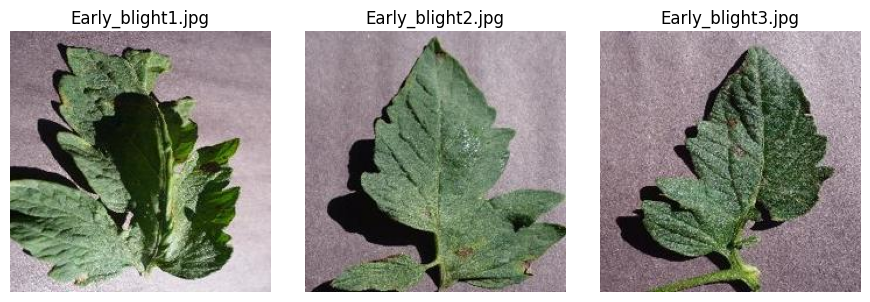

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the images
image_paths = [
    '/content/sample_data/Early_blight1.jpg',
    '/content/sample_data/Early_blight2.jpg',
    '/content/sample_data/Early_blight3.jpg'
]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Load and display the images
for ax, image_path in zip(axes, image_paths):
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide the axis
    ax.set_title(image_path.split('/')[-1])  # Display the image file name as the title

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 6.4Limitations and Future Work


**Limitations:**  
- **Data Diversity:** The misclassifications indicate that our model may struggle with diseases that have similar visual characteristics, especially in the early stages. This suggests a need for more diverse and representative training data.
- **Misclassifications:**  Despite high overall accuracy, there are still some misclassifications, particularly
between visually similar diseases 
- **Model Complexity:** While the majority voting mechanism improves accuracy, it also increases the complexity and computational cost of the system.


**Future Work:**  
1. **Verify Image Labels:** Ensure that all image labels are correct. Mislabeling can significantly impact the model's performance and lead to incorrect classifications.
2. **Check Image Quality:** Examine the quality of the images, including lighting and cropping. Poor image quality can result in the loss of critical lesion features, affecting the model's ability to accurately classify diseases.
3. **Include More Misclassified Images in Training Set:** Add more images of the misclassified categories to the training set. This will help the model learn to distinguish between similar diseases more effectively.
4. **Design Specific Image Augmentation Techniques:** Develop specific image augmentation methods that focus on the morphology and color characteristics of the lesions. This can enhance the model's ability to generalize and accurately classify different types of leaf diseases.
5. **Enhanced Data Augmentation:** Implementing more advanced data augmentation techniques to increase the diversity of the training set and improve the model's ability to generalize to new samples.
6. **Model Optimization:** Exploring more efficient model architectures, such as EfficientNetV2, which has shown promising results with an accuracy of 99% in leaf disease classification tasks.
7. **Explainability:** Developing methods to provide better interpretability and explainability of the model's predictions, helping users understand why certain misclassifications occur.